# Exploraaaaaaaaaaation #

In [2]:
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np

import json
from ast import literal_eval  # OP = OP, NP = P (by Articuno's Law)

%matplotlib inline

In [3]:
#datapath = 'data/'

In [4]:
plt.style.use('default')

## Loading Recipes ##

In [5]:
#filename = 'RAW_recipes.csv'

In [6]:
#df_recipes = pd.read_csv(datapath + filename, index_col='id')

In [7]:
#df_recipes['submitted'] = df_recipes['submitted'].astype('datetime64')

In [8]:
#for col in ['nutrition', 'tags', 'ingredients', 'steps']:
#    df_recipes[col] = df_recipes[col].apply(lambda x: literal_eval(x))

In [9]:
#df_recipes = df_recipes[df_recipes['minutes'] < 300]

## Loading Interactions ##

In [10]:
#filename = 'RAW_interactions.csv'

In [11]:
#df_inter = pd.read_csv(datapath + filename)

In [12]:
#df_inter['date'] = df_inter['date'].astype('datetime64')

## Avg rating, n votes and std ##

In [13]:
#data = [[i, df_sub.shape[0], df_sub.rating.mean(), df_sub.rating.std()] for i, df_sub in df_inter.groupby('recipe_id')]
#df_inter_recipe = pd.DataFrame(data, columns=['recipe_id', 'n_votes', 'avg_rating', 'std_rating'])

In [14]:
#df_inter_recipe = df_inter_recipe.set_index('recipe_id')

In [15]:
#df_inter_recipe

In [16]:
#df = df_recipes.join(df_inter_recipe)
#df.std_rating = df.std_rating.fillna(0)

In [17]:
#df

In [18]:
#df.describe()

In [19]:
#plot = sns.pairplot(df[['minutes', 'n_steps', 'n_ingredients', 'n_votes', 'avg_rating', 'std_rating']])
#plot.savefig('imgs/pairplot_recipes.png')

In [20]:
#with open('data/recipes.json', 'w') as f:
#    df.to_json(f, date_format='')

In [21]:
df = pd.read_json('data/recipes.json')

In [22]:
df.submitted = df.submitted.astype('datetime64')

## Things we don't want

In [23]:
# Recipes which take more than 5 hours
df = df[df['minutes'] < 300]

## Tag Analysis ##

In [24]:
df['tags'].to_numpy()[:2]

array([list(['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']),
       list(['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment'])],
      dtype=object)

In [25]:
df.tags

137739    [60-minutes-or-less, time-to-make, course, mai...
31490     [30-minutes-or-less, time-to-make, course, mai...
112140    [time-to-make, course, preparation, main-dish,...
59389     [60-minutes-or-less, time-to-make, course, mai...
44061     [weeknight, time-to-make, course, main-ingredi...
                                ...                        
486161    [ham, 60-minutes-or-less, time-to-make, course...
493372    [15-minutes-or-less, time-to-make, course, pre...
308080    [60-minutes-or-less, time-to-make, course, mai...
298512    [30-minutes-or-less, time-to-make, course, pre...
298509    [30-minutes-or-less, time-to-make, course, pre...
Name: tags, Length: 221458, dtype: object

In [26]:
tags = [j for i in df.tags for j in i]

In [27]:
tags_dict = Counter(tags)

In [28]:
tags_dict.most_common(50)

[('preparation', 220941),
 ('time-to-make', 219535),
 ('course', 208669),
 ('main-ingredient', 162196),
 ('dietary', 157973),
 ('easy', 120706),
 ('occasion', 109072),
 ('cuisine', 87211),
 ('low-in-something', 81784),
 ('60-minutes-or-less', 69988),
 ('main-dish', 66589),
 ('equipment', 64183),
 ('number-of-servings', 57100),
 ('30-minutes-or-less', 55075),
 ('vegetables', 51938),
 ('meat', 50828),
 ('taste-mood', 49644),
 ('4-hours-or-less', 49489),
 ('north-american', 46083),
 ('15-minutes-or-less', 43933),
 ('3-steps-or-less', 43131),
 ('desserts', 42003),
 ('low-sodium', 41666),
 ('low-carb', 39659),
 ('healthy', 38588),
 ('dinner-party', 35992),
 ('low-cholesterol', 35225),
 ('vegetarian', 34663),
 ('low-calorie', 34597),
 ('beginner-cook', 34091),
 ('5-ingredients-or-less', 33986),
 ('holiday-event', 33154),
 ('low-protein', 31466),
 ('inexpensive', 31325),
 ('oven', 30315),
 ('fruit', 30268),
 ('low-saturated-fat', 29870),
 ('american', 29606),
 ('eggs-dairy', 29345),
 ('pasta-

In [29]:
tags_dict.get('north-american')  # Biased towards low quality food

46083

In [30]:
# We will create dummies for these tags. For some of them, we are interested in True values, for others, in False
# healthy and healthy-2 will be combined
custom_tags = ['vegetarian', 'healthy', 'healthy-2', 'italian', 'beginner-cook', 'inexpensive', 'european']

In [31]:
df_tag = df.copy()[['submitted', 'tags', 'n_votes', 'avg_rating', 'std_rating']]

In [32]:
d_tags = df.tags.to_numpy()

for tag in custom_tags:
    dummy = np.array([tag in tags for i, tags in enumerate(d_tags)]).astype(int)
    df_tag[tag] = dummy

In [33]:
df_tag.healthy = df_tag.healthy.combine(df_tag['healthy-2'], func=max)
df_tag = df_tag.drop(columns='healthy-2')

In [34]:
df_tag = df_tag.drop(columns='tags')

In [35]:
df_tag

submitted  n_votes  avg_rating  std_rating  vegetarian  healthy  \
137739 2005-09-16        3         5.0    0.000000           1        0   
31490  2002-06-17        4         3.5    2.380476           0        0   
112140 2005-02-25        1         4.0    0.000000           0        0   
59389  2003-04-14        2         4.5    0.707107           0        0   
44061  2002-10-25        1         5.0    0.000000           1        0   
...           ...      ...         ...         ...         ...      ...   
486161 2012-08-29        6         5.0    0.000000           0        0   
493372 2013-01-09        1         5.0    0.000000           1        0   
308080 2008-06-07        5         5.0    0.000000           0        0   
298512 2008-04-15        1         1.0    0.000000           0        0   
298509 2008-04-15        3         2.0    2.645751           0        0   

        italian  beginner-cook  inexpensive  european  
137739        0              0            0         0  
31490         0              0            0         0  
112140        0              0            0         0  
59389         0              0            1         0  
44061         0              0            0         0  
...         ...            ...          ...       ...  
486161        0              0            0         0  
493372        0              0            0         0  
308080        0              0            0         0  
298512        0              0            0         0  
298509        0              0            0         0  

[221458 rows x 10 columns]

In [36]:
# Change dates to just represent the month
df_tag.submitted = df_tag.submitted.astype('datetime64[M]')

In [37]:
df_tag = df_tag[(df_tag['vegetarian']== 1)  | (df_tag['italian']== 1)  | (df_tag['healthy']== 1)  | (df_tag['beginner-cook'] == 1)  | (df_tag['inexpensive'] == 1)  | (df_tag['european']== 1)]

In [38]:
tags = ['vegetarian', 'italian',  'healthy', 'beginner-cook', 'inexpensive', 'european']

data = {tag: df_tag[df_tag[tag] == 1].submitted.value_counts() for tag in tags}
for k,v in data.items():
    data[k] = v.sort_index()

In [39]:
def sumseries(x, y):
    if np.isnan(x):
        return y
    elif np.isnan(y):
        return x
    else:
        return x+y

In [40]:
total = data['vegetarian']
for i, ele in enumerate(data):
    if i > 0:
        total = total.combine(data[ele], func=sumseries)

In [41]:
for tag, dic in data.items():
    data[tag] = pd.Series({k:v/total[k] for k, v in data[tag].items()})

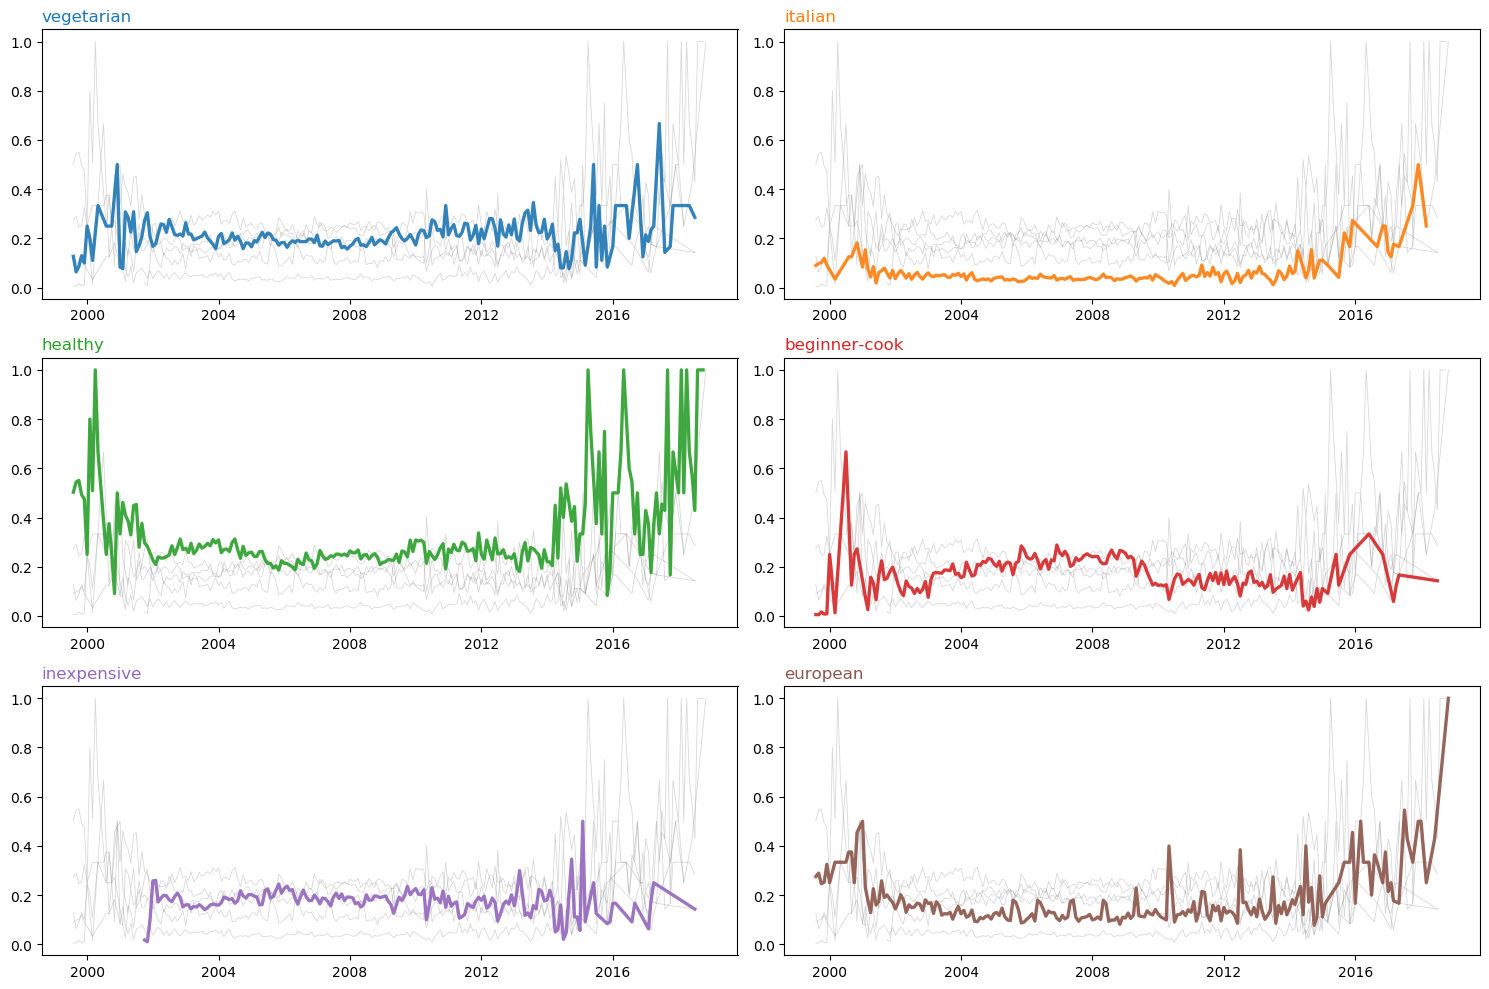

In [42]:
#plt.style.use('seaborn-darkgrid')

palette = plt.get_cmap('Set1')
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for i, ele in enumerate(data):
    j = i // 2
    k = i % 2
    for entry in data.keys():
        ax[j][k].plot(data[entry].index, data[entry].to_numpy(), marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data[ele].index, data[ele].to_numpy(), marker = '', color='C{}'.format(i), lw = 2.4, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=12, fontweight=0, color='C{}'.format(i))

fig.tight_layout()
#fig.savefig('imgs/tags.png')
plt.show()


### Tags Yearly ###

In [43]:
df_tag2 = df_tag.copy()
df_tag2.submitted = df_tag2.submitted.astype('datetime64[Y]')

In [44]:
data2 = {tag: df_tag2[df_tag2[tag] == 1].submitted.value_counts() for tag in tags}
for k,v in data2.items():
    data2[k] = v.sort_index()

In [45]:
#total = data2['vegetarian']
#for i, ele in enumerate(data2):
#    if i > 0:
#        total = total.combine(data2[ele], func=sumseries)

In [46]:
# Get number of monthly recipes
df_year = df.copy()
df_year.submitted = df_year.submitted.astype('datetime64[Y]')

In [47]:
total_dict = {k: v.shape[0] for k, v in df_year.groupby('submitted')}
total = pd.Series(total_dict)

In [48]:
data2

{'vegetarian': 1999-01-01     100
 2000-01-01      42
 2001-01-01     763
 2002-01-01    3545
 2003-01-01    2498
 2004-01-01    2179
 2005-01-01    3983
 2006-01-01    4374
 2007-01-01    4692
 2008-01-01    4156
 2009-01-01    3539
 2010-01-01    1912
 2011-01-01    1270
 2012-01-01     794
 2013-01-01     662
 2014-01-01     112
 2015-01-01      15
 2016-01-01       7
 2017-01-01      17
 2018-01-01       3
 Name: submitted, dtype: int64, 'italian': 1999-01-01     99
 2000-01-01     15
 2001-01-01    193
 2002-01-01    782
 2003-01-01    606
 2004-01-01    438
 2005-01-01    658
 2006-01-01    968
 2007-01-01    932
 2008-01-01    866
 2009-01-01    675
 2010-01-01    256
 2011-01-01    339
 2012-01-01    153
 2013-01-01    110
 2014-01-01     47
 2015-01-01     11
 2016-01-01      4
 2017-01-01     11
 2018-01-01      1
 Name: submitted, dtype: int64, 'healthy': 1999-01-01     499
 2000-01-01     178
 2001-01-01     999
 2002-01-01    3918
 2003-01-01    3378
 2004-01-01    3052
 2

In [49]:
for tag, dic in data2.items():
    data2[tag] = pd.Series({k:v/total[k] for k, v in data2[tag].items()})

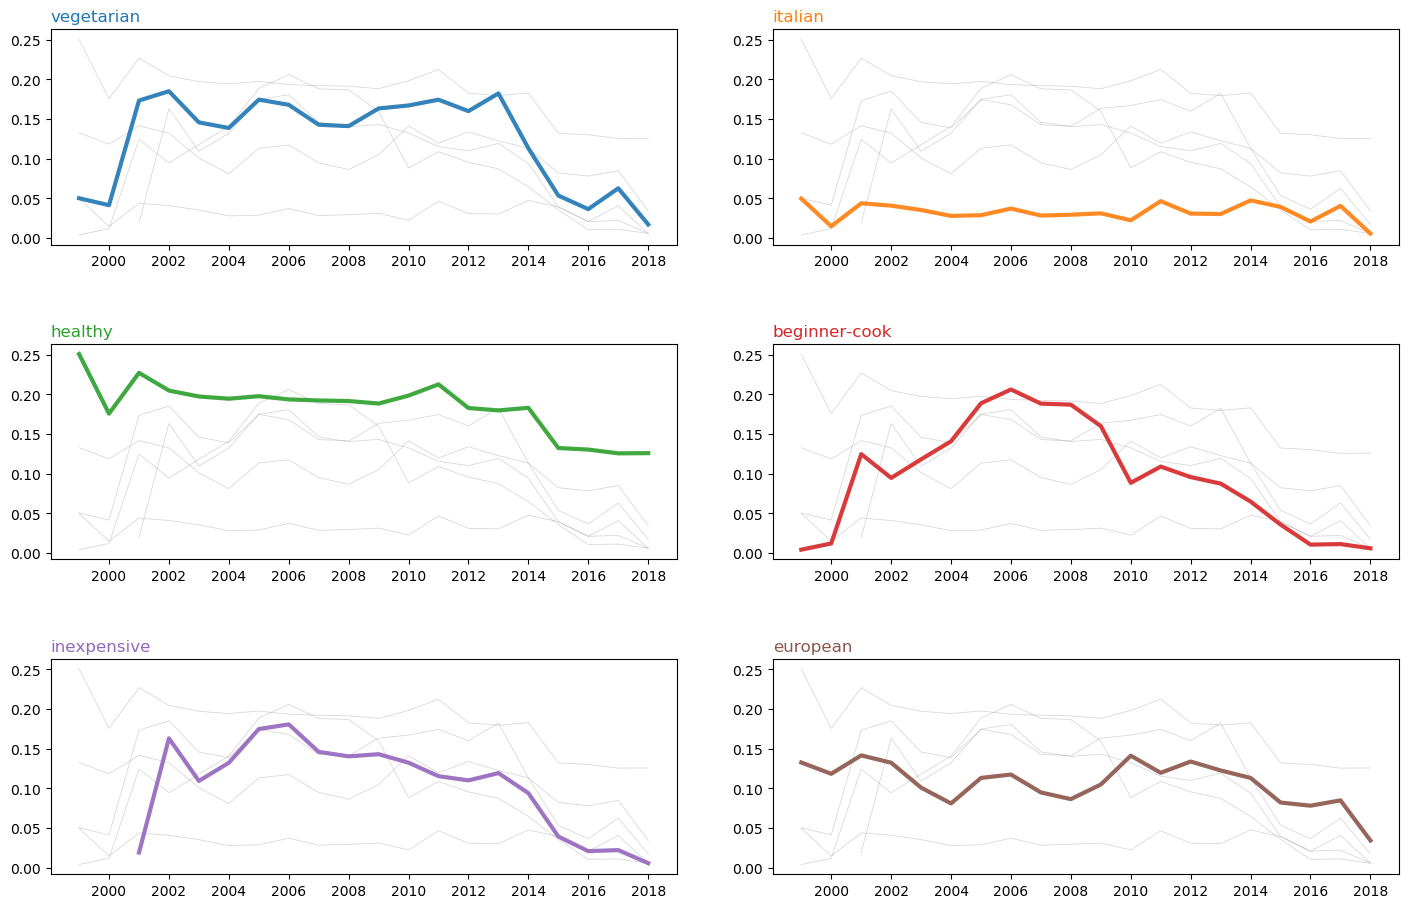

In [50]:
#plt.style.use('seaborn-darkgrid')
#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for i, ele in enumerate(data2):
    j = i // 2
    k = i % 2
    for entry in data2.keys():
        ax[j][k].plot(data2[entry].index, data2[entry].to_numpy(), marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data2[ele].index, data2[ele].to_numpy(), marker = '', color='C{}'.format(i), lw = 3, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=12, fontweight=0, color='C{}'.format(i))


fig.tight_layout(pad=4)
fig.savefig('imgs/tags_yearly.png')
plt.show()


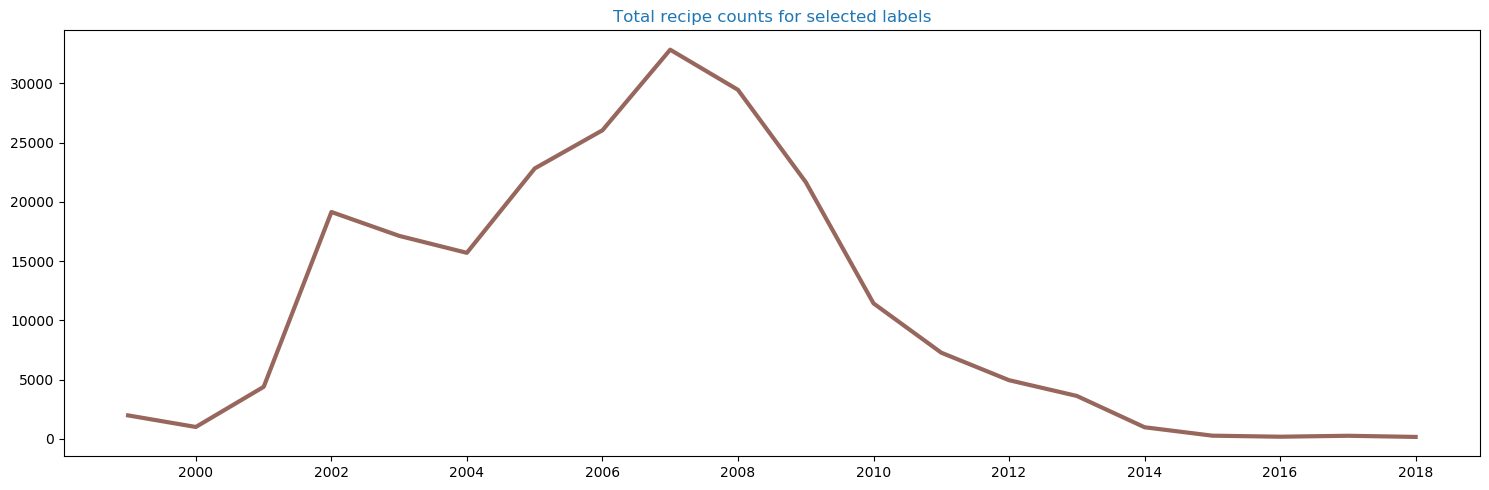

In [51]:
# Plotting yearly total

#plt.style.use('seaborn-darkgrid')

#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(total.index, total.to_numpy(), marker = '', color='C{}'.format(i), lw = 3, alpha = 0.9)
ax.set_title('Total recipe counts for selected labels', fontsize=12, fontweight=0, color='C0')

fig.tight_layout()
fig.savefig('imgs/tags_yearly_total.png')
plt.show()

## Ingredients (vegetarian and healthy)##

In [52]:
index = (df_tag[(df_tag.vegetarian == 1) & (df_tag.healthy == 1)]).index
df_ing = df.loc[index]
df_ing

name  minutes  \
81185                     mock a mole   low fat guacamole       15   
30300                       munch without guilt  tomatoes       10   
112959                     sour cream  avocado dip  vegan       10   
63793    tide me over   indian chaat  simple veggie salad        2   
120297              middle eastern   twice baked potatoes      110   
...                                                   ...      ...   
163808                                  zucchini  roasted       30   
292835                                 zucchini oat bread      105   
413205  zucchini  courgettes sauteed with sun dried to...       40   
455000                                       zulu cabbage       40   
196201                   zurie s overnight no knead bread       70   

        contributor_id  submitted  \
81185            67026 2004-01-15   
30300             6164 2002-06-04   
112959          167849 2005-03-08   
63793            12657 2003-06-05   
120297          197023 2005-05-02   
...                ...        ...   
163808          156862 2006-04-11   
292835          324390 2008-03-19   
413205          485109 2010-02-16   
455000         1058097 2011-05-04   
196201          200862 2006-11-18   

                                                     tags  \
81185   [15-minutes-or-less, time-to-make, course, mai...   
30300   [15-minutes-or-less, time-to-make, course, mai...   
112959  [lactose, 15-minutes-or-less, time-to-make, co...   
63793   [15-minutes-or-less, time-to-make, course, mai...   
120297  [time-to-make, course, main-ingredient, cuisin...   
...                                                   ...   
163808  [30-minutes-or-less, time-to-make, course, mai...   
292835  [time-to-make, course, main-ingredient, prepar...   
413205  [weeknight, 60-minutes-or-less, time-to-make, ...   
455000  [60-minutes-or-less, time-to-make, course, mai...   
196201  [time-to-make, course, main-ingredient, prepar...   

                                                nutrition  n_steps  \
81185             [115.9, 7.0, 21.0, 19.0, 9.0, 3.0, 5.0]        7   
30300                 [3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]        3   
112959               [12.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]        6   
63793               [73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]        4   
120297         [327.6, 11.0, 16.0, 14.0, 21.0, 6.0, 18.0]       14   
...                                                   ...      ...   
163808               [18.9, 0.0, 8.0, 0.0, 2.0, 0.0, 1.0]        7   
292835  [4588.6, 226.0, 1501.0, 141.0, 178.0, 213.0, 2...       19   
413205             [115.4, 7.0, 33.0, 6.0, 8.0, 3.0, 5.0]       12   
455000              [94.0, 7.0, 25.0, 4.0, 4.0, 3.0, 4.0]        5   
196201        [1379.6, 5.0, 12.0, 194.0, 79.0, 3.0, 96.0]       82   

                                                    steps  \
81185   [thaw peas by running hot water over them in a...   
30300   [put a slice of tomato on each biscuit / crack...   
112959  [peel and pit avocado , put in a large mixing ...   
63793   [toss everything well in a serving bowl, grab ...   
120297  [preheat the oven to 200c, wash the potatoes t...   
...                                                   ...   
163808  [preheat oven to 375, cut zucchini in half or ...   
292835  [preheat oven to 350 degrees f, lightly coat a...   
413205  [place the sundried tomatoes in the 3 / 4 cup ...   
455000  [heat the oil in a large skillet, add onion an...   
196201  [since first making this bread according to th...   

                                              description  \
81185                        from crescent dragonwagon's    
30300   anytime munchies...another sweat free preparat...   
112959  i made this up when i had an avocado that was ...   
63793   this version of the famous indian chaat (prono...   
120297  a delicious yet low-fat twice-baked potato sid...   
...                                                   ...   
163808  chef paul prudhomme's mag

In [53]:
ingredients = [j for i in df_ing.ingredients for j in i]

In [54]:
ingredients_dict = Counter(ingredients)

In [55]:
ingredients_dict.most_common(50)

[('salt', 4225),
 ('olive oil', 2351),
 ('water', 2216),
 ('sugar', 1831),
 ('onion', 1582),
 ('garlic cloves', 1441),
 ('tomatoes', 988),
 ('garlic', 934),
 ('butter', 865),
 ('lemon juice', 820),
 ('salt and pepper', 776),
 ('cinnamon', 650),
 ('pepper', 638),
 ('black pepper', 618),
 ('baking powder', 618),
 ('extra virgin olive oil', 613),
 ('brown sugar', 612),
 ('vegetable oil', 610),
 ('flour', 606),
 ('honey', 602),
 ('garlic clove', 579),
 ('milk', 561),
 ('oil', 497),
 ('ground cumin', 488),
 ('carrots', 481),
 ('zucchini', 477),
 ('parmesan cheese', 461),
 ('red onion', 454),
 ('all-purpose flour', 445),
 ('eggs', 443),
 ('onions', 430),
 ('potatoes', 429),
 ('carrot', 426),
 ('baking soda', 420),
 ('fresh cilantro', 408),
 ('fresh parsley', 388),
 ('egg', 375),
 ('ground cinnamon', 370),
 ('cumin', 352),
 ('fresh lemon juice', 350),
 ('orange juice', 340),
 ('chili powder', 331),
 ('fresh ground black pepper', 331),
 ('soy sauce', 321),
 ('celery', 321),
 ('black beans', 31

In [56]:
# We will use not = to filter, but contains, so that garlic cloves and garlic clove are grouped, and so on...
ing_custom = ['onion', 'garlic', 'tomato', 'cheese', 'egg', 'carrot']

In [57]:
d_ings = df_ing.ingredients.to_numpy()

for ing in ing_custom:
    dummy = np.array([np.array([ing in ingr for ingr in ings]).any() for ings in d_ings]).astype(int)
    df_ing[ing] = dummy

In [58]:
df_ing.submitted = df_ing.submitted.astype('datetime64[Y]')

In [59]:
data = {ing: df_ing[df_ing[ing] == 1].submitted.value_counts() for ing in ing_custom}
for k,v in data.items():
    data[k] = v.sort_index()

In [60]:
for ing, dic in data.items():
    data[ing] = pd.Series({k:v/total[k] for k, v in data[ing].items()})

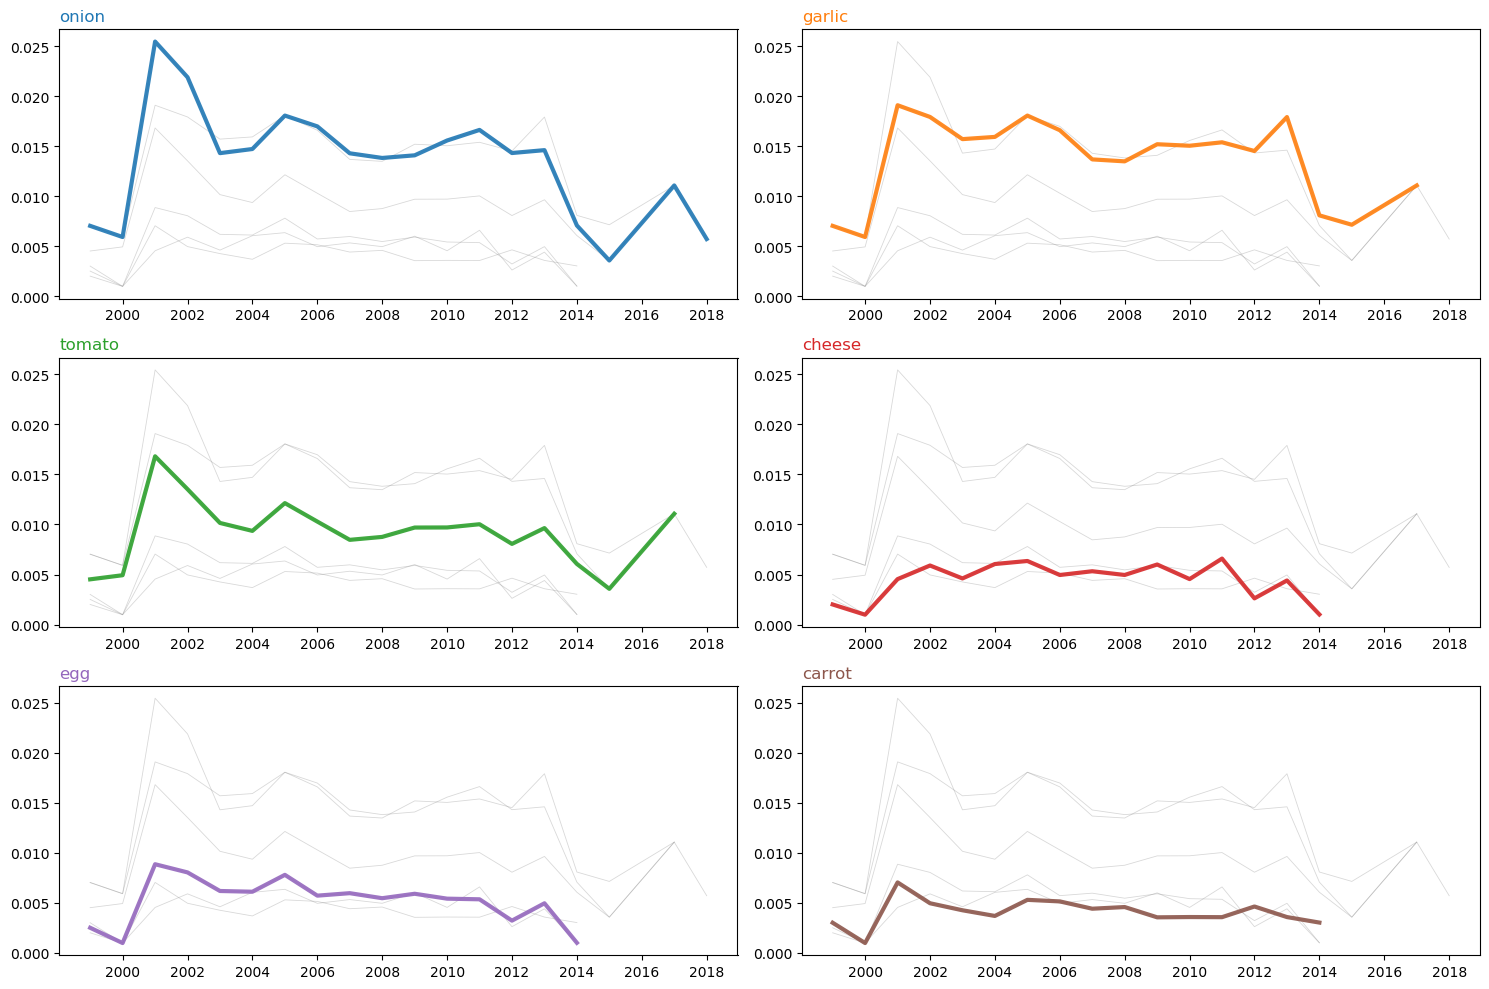

In [61]:
#plt.style.use('seaborn-darkgrid')

#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for i, ele in enumerate(data):
    j = i // 2
    k = i % 2
    for entry in data.keys():
        ax[j][k].plot(data[entry].index, data[entry].to_numpy(), marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data[ele].index, data[ele].to_numpy(), marker = '', color='C{}'.format(i), lw = 3, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=12, fontweight=0, color='C{}'.format(i))

fig.tight_layout()
fig.savefig('imgs/ing_yearly.png')
plt.show()


In [62]:
for i in df_ing.ingredients:
    print(i)
df_ing

['frozen peas', 'hass avocado', 'salt', 'lemons, juice of', 'tomatoes', 'onion', 'cilantro']
['tomatoes', 'crackers', 'mayonnaise', 'black pepper']
['soft silken tofu', 'avocado', 'chunky salsa', 'fresh cilantro', 'lime juice', 'hot sauce', 'salt and pepper']
['cucumber', 'potato', 'chopped tomato', 'plain yogurt', 'chat masala', 'paprika', 'salt']
['baking potatoes', 'olive oil', 'chickpeas', 'coriander', 'ground cumin', 'fresh coriander', 'garlic cloves', 'low-fat yogurt', 'tahini', 'salt & freshly ground black pepper']
['rice vinegar', 'maple syrup', 'soy sauce', 'sesame oil', 'gingerroot', 'green cabbage', 'red cabbage', 'carrot', 'green onion', 'apple']
['ghee', 'kidney beans', 'onion', 'garlic clove', 'carrot', 'potatoes', 'garam masala', 'curry powder', 'tabasco sauce', 'salt and pepper', 'water']
['black beans', 'oil', 'frozen corn', 'garlic', 'onion', 'cumin', 'green chili sauce', 'salsa', 'chili powder', 'flour', 'dry breadcrumbs']
['plain tomato juice', 'old bay seasoning']


['onions', 'vegetable oil', 'cabbage', 'chili peppers', 'fresh ginger', 'water', 'sweet potatoes', 'salt', 'fresh tomatoes', 'okra', 'fresh lime juice', 'fresh cilantro', 'peanuts']
['sliced mushrooms', 'salt', 'olive oil', 'garlic cloves', 'cashews', 'maple syrup', 'brussels sprout']
['bread flour', 'whole wheat flour', 'oats', 'wheat germ', 'sunflower seeds', 'flax seed', 'salt', 'dry yeast', 'sugar', 'warm water', 'flour', 'sesame seeds']
['all-purpose flour', 'sugar', 'baking powder', 'corn oil', 'quick oats', 'carnation evaporated milk', 'maple syrup', 'egg']
['russet potatoes', 'onion', 'garlic', 'frozen spinach', 'fresh parsley', 'curry powder', 'chili powder', 'turmeric', 'cinnamon', 'cayenne', 'tomato sauce', 'oil', 'salt', 'peas', 'cauliflower']
['flour', 'quick-rising yeast', 'salt', 'hot water']
['garbanzo beans', 'garlic', 'fresh lemon juice', 'tahini', 'cumin powder', 'salt', 'water', 'pine nuts', 'paprika', 'tomatoes', 'cucumber', 'parsley', 'carrot', 'celery', 'radish']

['red bell peppers', 'yellow bell peppers', 'orange bell peppers']
['fresh strawberries', 'sugar', 'cornstarch', 'water', 'pie shells']
['1% low-fat milk', 'cornstarch', 'maple syrup', 'salt', 'vanilla extract']
['sun-dried tomato packed in oil', 'garlic cloves', 'plum tomato', 'white wine', 'olive oil', 'green bell pepper', 'farfalle pasta']
['farfalle pasta', 'extra virgin olive oil', 'garlic', 'fresh broccoli florets', 'salt', 'nutmeg', 'fresh ground black pepper', 'part-skim ricotta cheese']
['farfalle pasta', 'cottage cheese', 'sour cream', 'fresh basil leaf', 'salt', 'pine nuts', 'garlic', 'red pepper flakes', 'parmesan cheese']
['red peppers', 'extra virgin olive oil', 'chickpeas', 'plum tomatoes', 'sweet onion', 'garlic cloves', 'lemons', 'dried sweet basil leaves', 'dried oregano', 'dried parsley', 'fresh parmesan cheese', 'farfalle pasta']
['farfalle pasta', 'onion', 'garlic cloves', 'olive oil', 'tomato sauce', 'diced tomatoes', 'salt & pepper', 'dried basil', 'dried oregano

['firm tofu', 'nutritional yeast', 'turmeric', 'onion powder', 'low sodium soy sauce', 'pepper']
['garbanzo beans', 'olive oil', 'tahini', 'water', 'lime juice', 'garlic', 'jalapenos', 'paprika', 'salt']
['avocados', 'tomatoes', 'onion', 'jalapeno peppers', 'lime juice', 'sugar', 'salad greens']
['yeast', 'warm water', 'milk', 'sugar', 'shortening', 'salt', 'flour', 'eggs', 'yellow cornmeal', 'jalapenos', 'cheddar cheese']
['cabbage', 'tomatoes', 'green onions', 'jalapeno peppers', 'cider vinegar', 'honey', 'salt']
['milk', 'butter', 'egg substitute', 'salt', 'bread flour', 'whole wheat flour', 'sugar', 'active dry yeast', 'jalapeno pepper', 'jalapeno peppers', 'garlic cloves', 'parmesan cheese']
['crushed pineapple', 'jalapeno jelly', 'whole grain mustard']
['tomatoes', 'jalapeno peppers', 'onion', 'garlic', 'cilantro', 'oregano', 'salt', 'cumin', 'cider vinegar']
['sugar', 'water', 'cider vinegar', 'ground cinnamon', 'salt', 'ground cloves', 'ground nutmeg', 'ground ginger', 'jalapen

['oranges', 'kalamata olives', 'lemon juice', 'ground cumin', 'chili powder', 'superfine sugar', 'salt']
['garlic powder', 'orange zest', 'orange juice', 'olive oil', 'balsamic vinegar', 'cooked rice', 'baby spinach leaves', 'dried apricot', 'green onions', 'pine nuts']
['navel oranges', 'water', 'plain yogurt', 'ice cube', 'vanilla extract', 'sugar']
['active dry yeast', 'unbleached white flour', 'salt', 'sugar', 'orange zest', 'egg', 'butter', 'warm water', 'orange juice', 'almond extract', 'raisins', 'sliced almonds']
['water', 'salt', 'orange juice', 'vegetable oil', 'sugar', 'old fashioned oats', 'whole wheat flour', 'all-purpose flour', 'orange rind', 'dried cranberries', 'active dry yeast']
['fresh carrots', 'mandarin oranges', 'lemon juice', 'honey', 'ground cinnamon']
['olive oil', 'extra firm tofu', 'garlic cloves', 'green onions', 'water', 'orange juice', 'lemon juice', 'vinegar', 'soy sauce', 'brown sugar', 'red pepper flakes', 'cornstarch', 'cooked rice']
['orange', 'orang

['chickpeas', 'carrot', 'red onion', 'green bell pepper', 'lemon juice', 'olive oil', 'salt & freshly ground black pepper', 'fresh parsley leaves']
['dry red wine', 'club soda', 'lemon juice', 'orange juice', 'cognac', 'lemons', 'oranges', 'cinnamon sticks', 'ice cube', 'water', 'sugar']
['refined flour', 'dutch-processed cocoa powder', 'baking powder', 'baking soda', 'salt', 'margarine', 'sugar', 'egg whites', 'fresh orange juice', 'vanilla essence', 'icing sugar']
['onions', 'green bell peppers', 'plum tomatoes', 'salsa', 'garlic', 'cumin', 'black beans', 'corn tortillas', 'cheddar cheese', 'avocados']
['all-purpose flour', 'granulated sugar', 'salt', 'active dry yeast', 'milk', 'butter', 'egg', 'cinnamon', 'nutmeg', 'brown sugar', 'powdered sugar', 'water']
['green chili peppers', 'onion', 'ground cumin', 'ground coriander', 'dried oregano', 'salt', 'vegetable oil', 'carrot', 'sweet potatoes', 'potatoes', 'water', 'red bell peppers', 'chopped tomato', 'corn kernel', 'zucchini', 'neu

['lasagna noodles', 'water', 'green pepper', 'onion', 'fresh mushrooms', 'garlic cloves', 'bay leaves', 'basil', 'oregano', 'tomato sauce', 'tomato paste', 'medium firm tofu', 'fresh spinach', 'dried oregano', 'dried basil', 'sage']
['cooking spray', 'canola oil', 'extra firm tofu', 'soya sauce', 'toasted sesame oil', 'carrots', 'garlic clove', 'ginger', 'scallions', 'sweet red pepper', 'green pepper', 'mushroom', 'water chestnuts', 'cooked brown rice']
['firm tofu', 'lemon juice', 'olive oil', 'garlic clove', 'salt', 'nutritional yeast flakes', 'fresh basil leaves', 'fresh black pepper']
['firm tofu', 'mushrooms', 'shallots', 'carrot', 'onion', 'celery rib', 'tomato paste', 'red wine', 'vegetable stock', 'garlic cloves', 'peanut oil', 'salt']
['olive oil', 'garlic cloves', 'onions', 'bell pepper', 'firm tofu', 'tomato paste', 'soy sauce', 'paprika', 'cumin', 'oregano', 'corn', 'whole wheat tortillas', 'salsa']
['firm tofu', 'onion', 'red bell pepper', 'green bell pepper', 'garlic', 'd

name  minutes  \
81185                     mock a mole   low fat guacamole       15   
30300                       munch without guilt  tomatoes       10   
112959                     sour cream  avocado dip  vegan       10   
63793    tide me over   indian chaat  simple veggie salad        2   
120297              middle eastern   twice baked potatoes      110   
...                                                   ...      ...   
163808                                  zucchini  roasted       30   
292835                                 zucchini oat bread      105   
413205  zucchini  courgettes sauteed with sun dried to...       40   
455000                                       zulu cabbage       40   
196201                   zurie s overnight no knead bread       70   

        contributor_id  submitted  \
81185            67026 2004-01-01   
30300             6164 2002-01-01   
112959          167849 2005-01-01   
63793            12657 2003-01-01   
120297          197023 2005-01-01   
...                ...        ...   
163808          156862 2006-01-01   
292835          324390 2008-01-01   
413205          485109 2010-01-01   
455000         1058097 2011-01-01   
196201          200862 2006-01-01   

                                                     tags  \
81185   [15-minutes-or-less, time-to-make, course, mai...   
30300   [15-minutes-or-less, time-to-make, course, mai...   
112959  [lactose, 15-minutes-or-less, time-to-make, co...   
63793   [15-minutes-or-less, time-to-make, course, mai...   
120297  [time-to-make, course, main-ingredient, cuisin...   
...                                                   ...   
163808  [30-minutes-or-less, time-to-make, course, mai...   
292835  [time-to-make, course, main-ingredient, prepar...   
413205  [weeknight, 60-minutes-or-less, time-to-make, ...   
455000  [60-minutes-or-less, time-to-make, course, mai...   
196201  [time-to-make, course, main-ingredient, prepar...   

                                                nutrition  n_steps  \
81185             [115.9, 7.0, 21.0, 19.0, 9.0, 3.0, 5.0]        7   
30300                 [3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]        3   
112959               [12.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]        6   
63793               [73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]        4   
120297         [327.6, 11.0, 16.0, 14.0, 21.0, 6.0, 18.0]       14   
...                                                   ...      ...   
163808               [18.9, 0.0, 8.0, 0.0, 2.0, 0.0, 1.0]        7   
292835  [4588.6, 226.0, 1501.0, 141.0, 178.0, 213.0, 2...       19   
413205             [115.4, 7.0, 33.0, 6.0, 8.0, 3.0, 5.0]       12   
455000              [94.0, 7.0, 25.0, 4.0, 4.0, 3.0, 4.0]        5   
196201        [1379.6, 5.0, 12.0, 194.0, 79.0, 3.0, 96.0]       82   

                                                    steps  \
81185   [thaw peas by running hot water over them in a...   
30300   [put a slice of tomato on each biscuit / crack...   
112959  [peel and pit avocado , put in a large mixing ...   
63793   [toss everything well in a serving bowl, grab ...   
120297  [preheat the oven to 200c, wash the potatoes t...   
...                                                   ...   
163808  [preheat oven to 375, cut zucchini in half or ...   
292835  [preheat oven to 350 degrees f, lightly coat a...   
413205  [place the sundried tomatoes in the 3 / 4 cup ...   
455000  [heat the oil in a large skillet, add onion an...   
196201  [since first making this bread according to th...   

                                              description  \
81185                        from crescent dragonwagon's    
30300   anytime munchies...another sweat free preparat...   
112959  i made this up when i had an avocado that was ...   
63793   this version of the famous indian chaat (prono...   
120297  a delicious yet low-fat twice-baked potato sid...   
...                                                   ...   
163808  chef paul prudhomme's mag

# Ingredients controversy

In [63]:
st_ing = {k:df_ing[df_ing[k]==1]['std_rating'].mean() for k in ing_custom }
rating_ing = {k:df_ing[df_ing[k]==1]['avg_rating'].mean() for k in ing_custom }
n_ing = {k:df_ing[df_ing[k]==1]['n_votes'].mean() for k in ing_custom }

In [64]:
df.shape

(221458, 14)

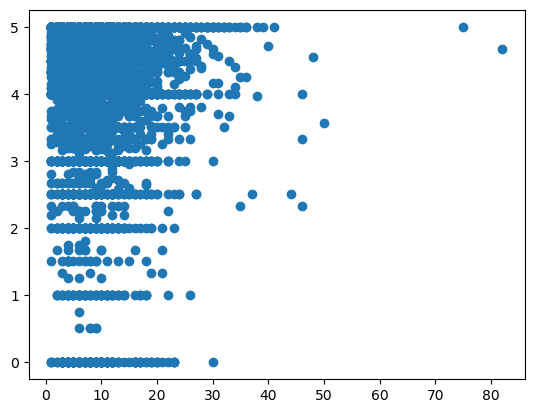

In [65]:
plt.scatter(df_ing['n_steps'], df_ing['avg_rating'])

In [66]:
dlen = []
for i in df['description']:
    if i:
        dlen.append(len(i.split(' ')))
    else:
        dlen.append(0)
df['dlen'] = dlen

In [67]:
dname = []
for i in df['name']:
    if i:
        dname.append(len(i.split(' ')))
    else:
        dname.append(0)
df['dname'] = dname

In [68]:
print('nIngredients:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['n_ingredients'].median())
print('Minutes:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['minutes'].median())
print('nSteps:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['n_steps'].median())
print('Desc length:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['dlen'].median())
print('Name length:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['dname'].median())

nIngredients: 9.0
Minutes: 35.0
nSteps: 8.0
Desc length: 34.0
Name length: 5.0


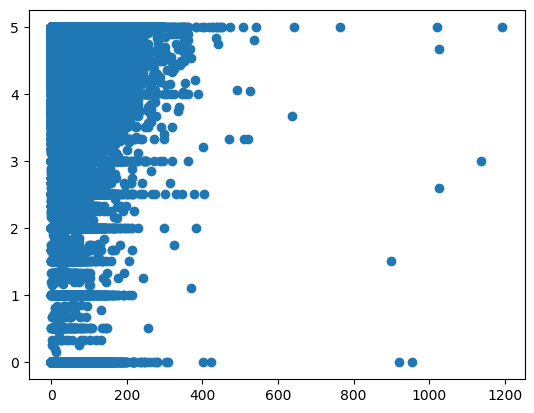

In [69]:
plt.scatter(df['dlen'], df['avg_rating'])

In [70]:
#plt.scatter(df_ing['dlen'], df_ing['avg_rating'])

# Overall name for healthy + vegetarian

In [71]:
irr = ['s', 'with', 'and', 'the', 'for']

In [72]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

def generate_wordcloud(name, series=None, freq=None, irrelevant_words=[], bg='white') -> Counter:
    """Plot wordcloud given series of text.
    
    :param name: name of the figure to save
    :param series: the pd.Series of text
    :param freq: the dictionary of frequencies
    :param irrelevant_words: list of words to exclude
    :param bg: the background color for the cloud
    :return: a collections.Counter of every word
    """
    lo = None
    if series is not None:
        lucastemmer = PorterStemmer()
        text = [lucastemmer.stem(term) for term in word_tokenize(series.str.cat(sep=' '))]
        lo = Counter(text)
        irr = ['s', 'with', 'and']
        lo = {k:v for k,v in lo.items() if k not in irrelevant_words}
    else:
        lo = freq
    
    # Plot
    wordcloud = WordCloud(width = 1920, height = 1080, 
                background_color = bg, 
                stopwords = [' ', '  '], 
                min_font_size = 10).generate_from_frequencies(lo) 

    # plot the WordCloud image
    plt.figure(figsize = (19.2, 10.8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.savefig('imgs/{}.png'.format(name))

    plt.show()
    
    return lo

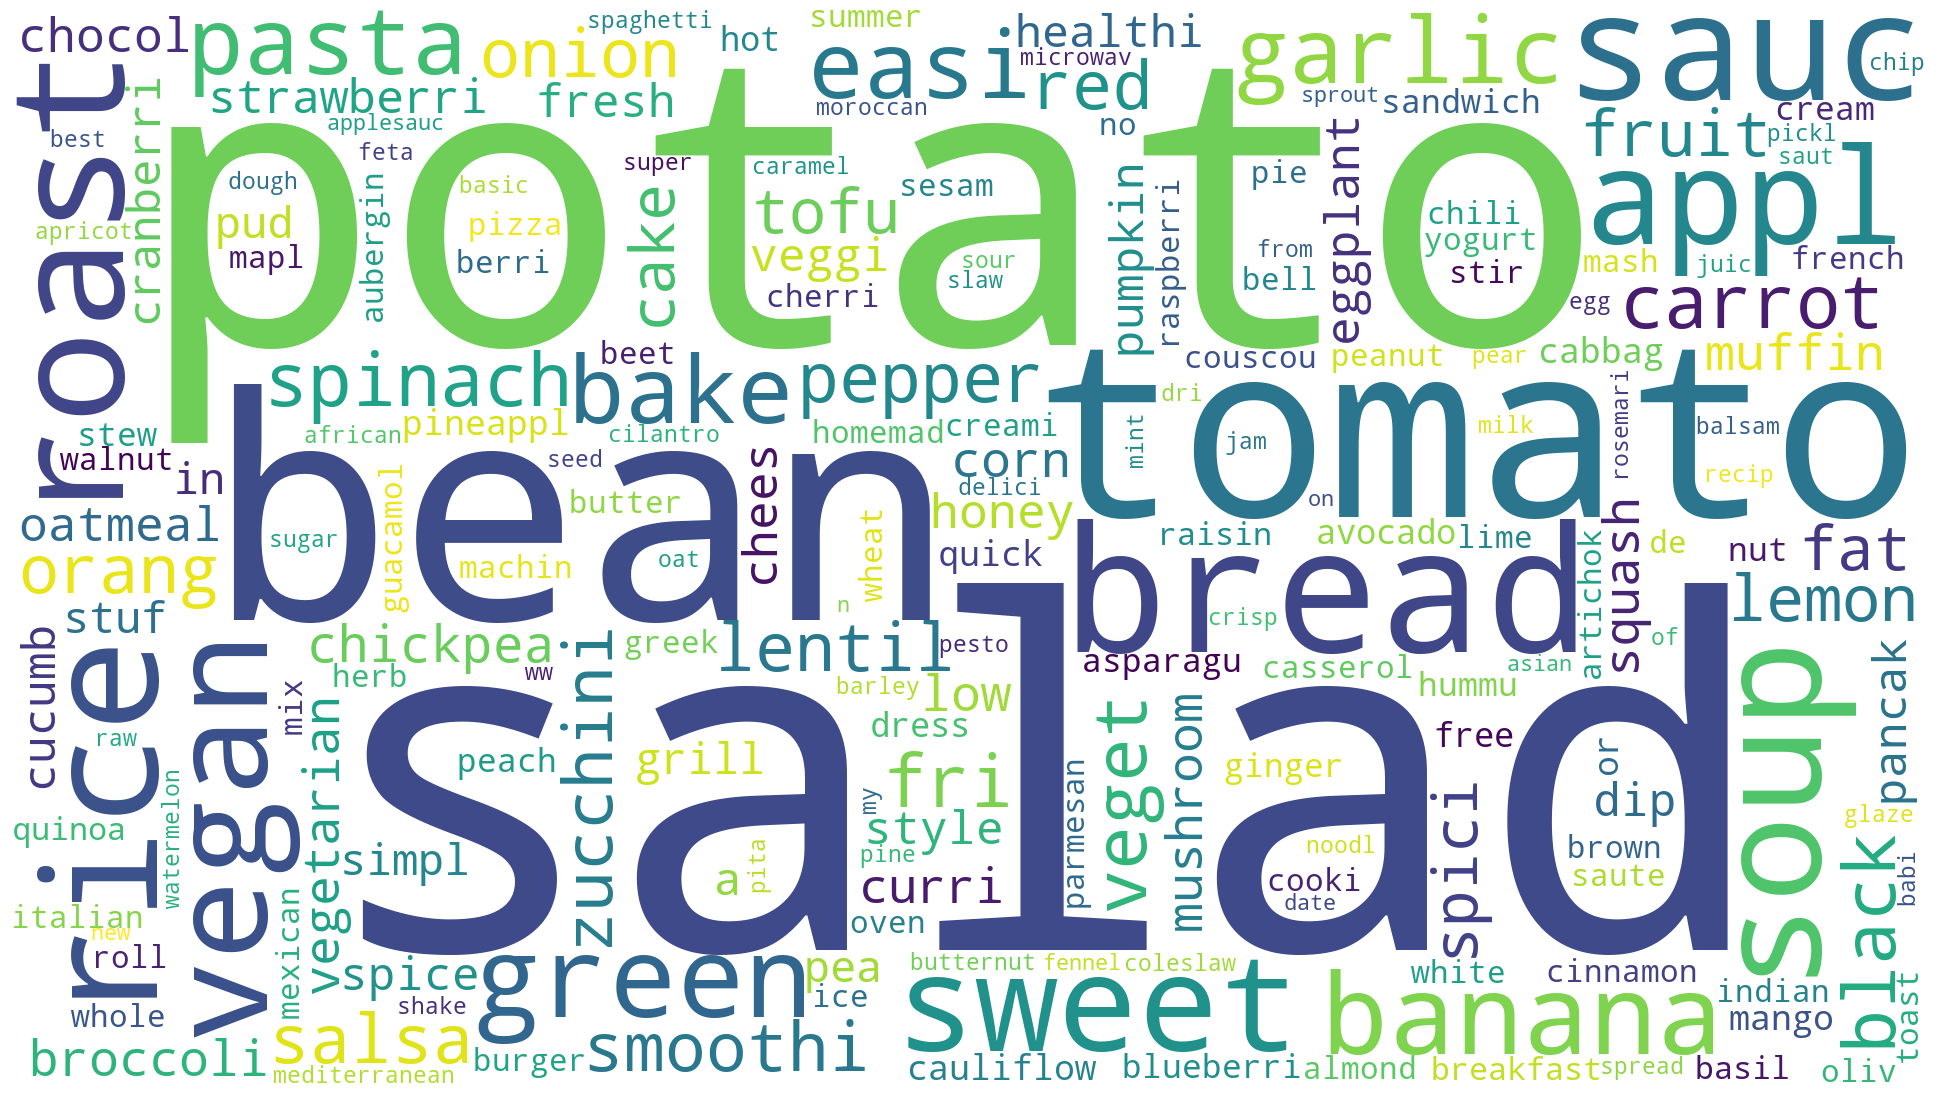

In [73]:
lo = generate_wordcloud('general_name', df_ing.name, None, irr)

# Keywords to be loved? vegetarian + healthy

In [74]:
df_ing[['n_votes', 'avg_rating', 'std_rating']].describe()

n_votes    avg_rating    std_rating
count  10174.00000  10174.000000  10174.000000
mean       5.80342      4.340736      0.531406
std       15.72168      0.919504      0.774262
min        1.00000      0.000000      0.000000
25%        1.00000      4.000000      0.000000
50%        2.00000      4.666667      0.000000
75%        5.00000      5.000000      0.707107
max      592.00000      5.000000      3.535534

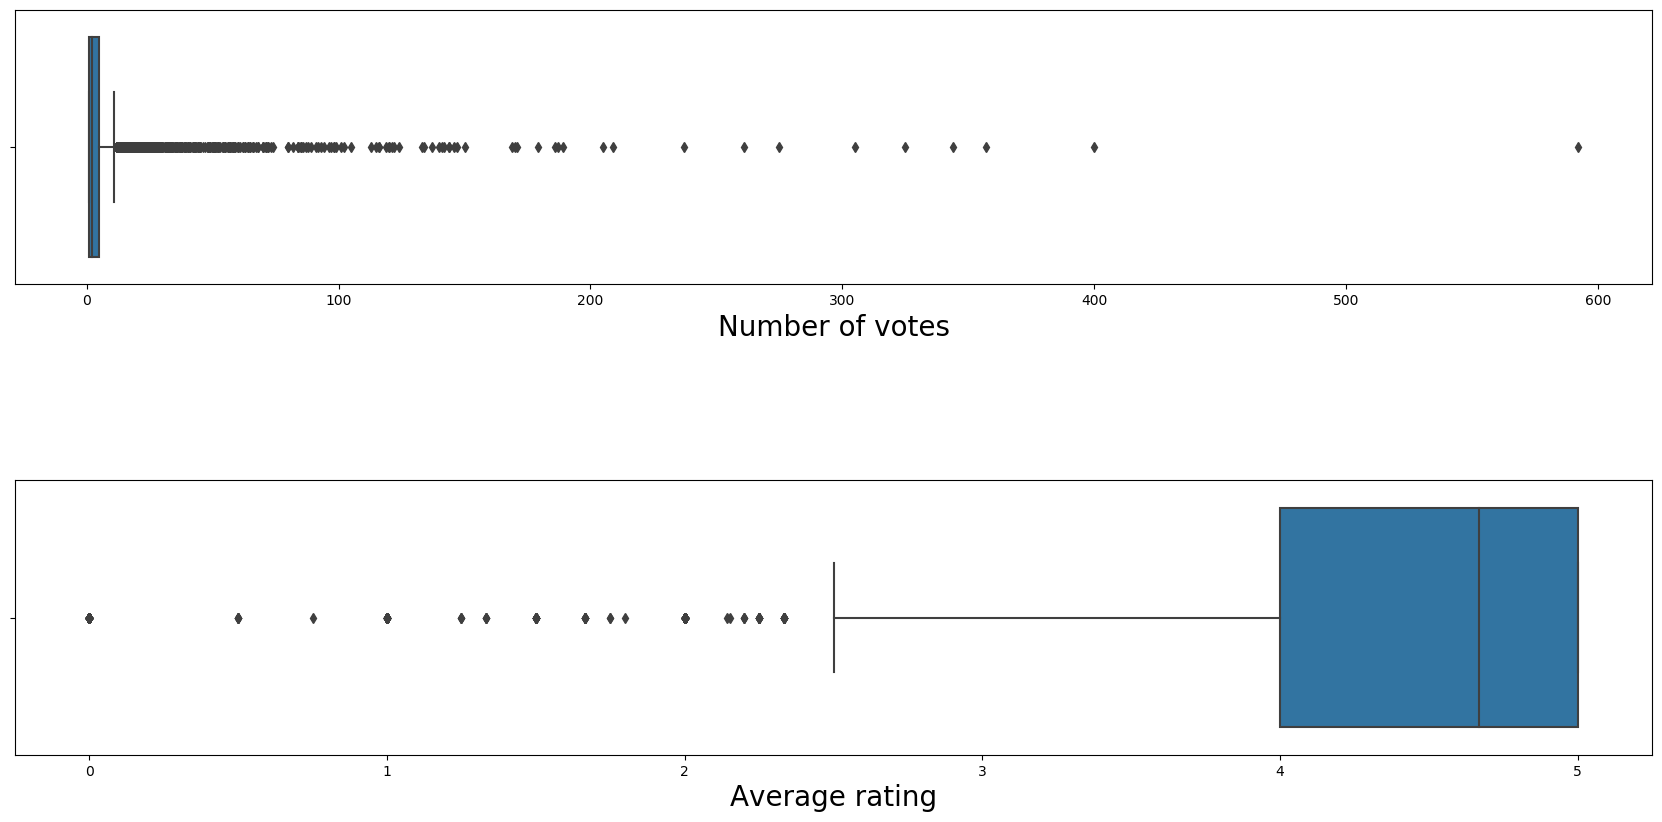

In [80]:
fig, ax = plt.subplots(2, 1, figsize=(19.2, 10.8))

# N_votes
sns.boxplot(df_ing.n_votes, ax=ax[0])
ax[0].set_xlabel('Number of votes', fontsize=20)
#ax[0].set_title('Boxplot for number of votes')
#plt.xticks(fontsize=17)

# Avg_rating
sns.boxplot(df_ing.avg_rating, ax=ax[1])
ax[1].set_xlabel('Average rating', fontsize=20)
#ax[1].set_title('Boxplot for average rating')
#plt.xticks(fontsize=17)


fig.tight_layout(pad=10)

fig.savefig('imgs/votes_rating_veghealth.png')

plt.show()

In [74]:
df_ing[df_ing.avg_rating <= 4].shape[0], df_ing[df_ing.avg_rating == 5].shape[0]

(3110, 3822)

In [75]:
df_ing[df_ing.n_votes <= 1].shape[0], df_ing[df_ing.n_votes >= 5].shape[0]

(3373, 2918)

# Popularity (n_votes)

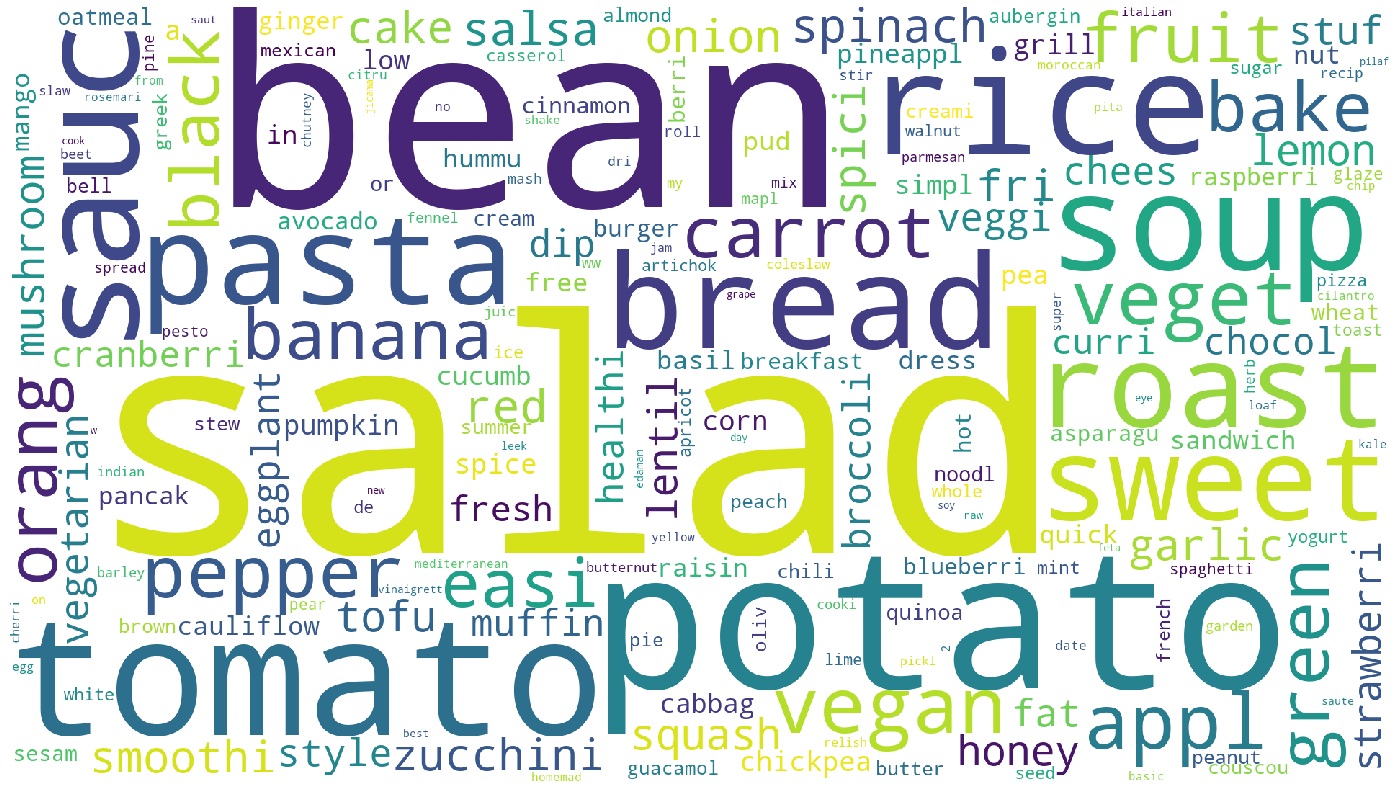

In [77]:
low_size = df_ing[df_ing.n_votes <= 1].shape[0]
lo_low = generate_wordcloud('lalala', df_ing[df_ing.n_votes <= 1].name, None, irr)

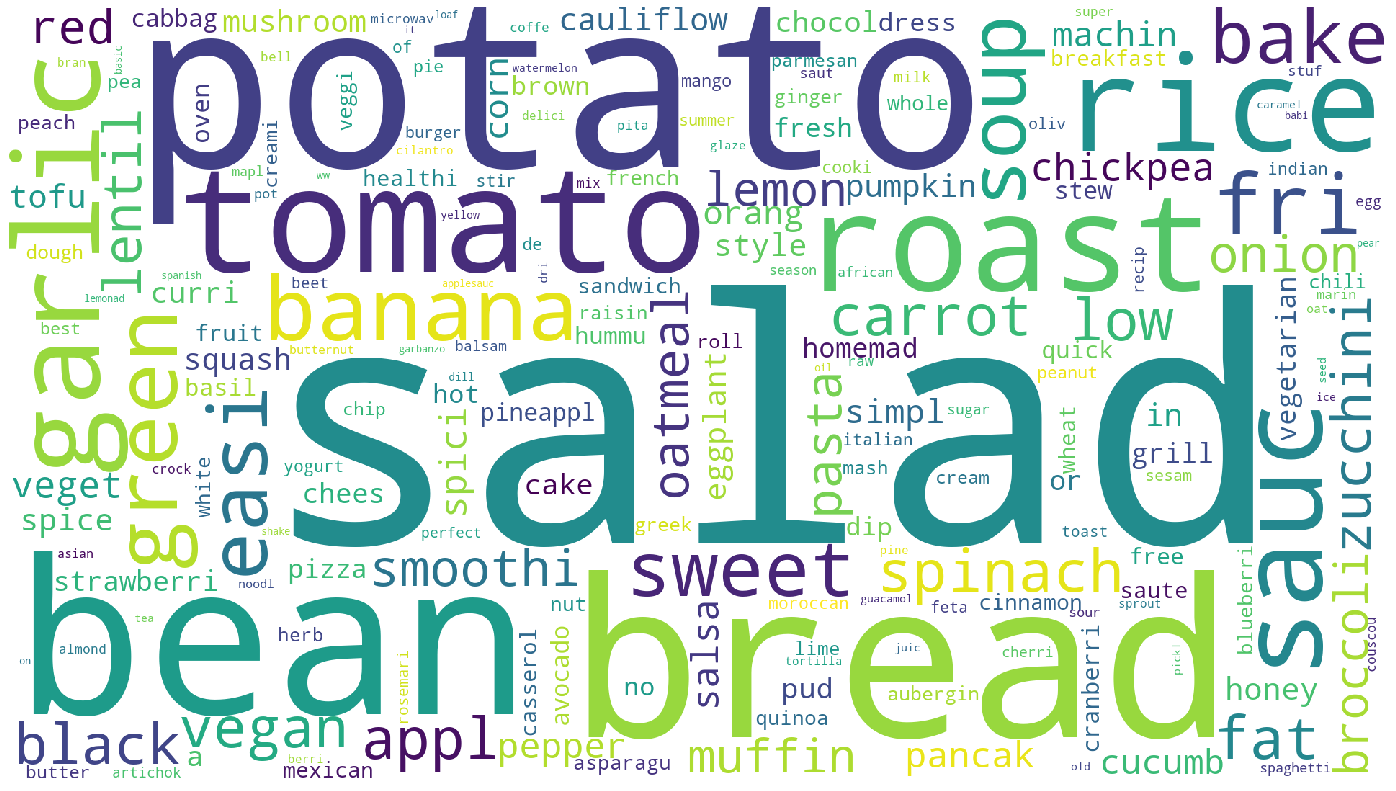

In [78]:
high_size = df_ing[df_ing.n_votes >= 5].shape[0]
lo_high = generate_wordcloud('lalala', df_ing[df_ing.n_votes >= 5].name, None, irr)

In [79]:
set(list(lo_low.keys()) + list(lo_high.keys()))

{'ritual',
 'salat',
 'mockamol',
 'vall',
 'puti',
 'cat',
 'tender',
 'haroset',
 'yum',
 'anna',
 'salata',
 'probabl',
 'preserv',
 'dandelion',
 'fassoula',
 'dreami',
 'di',
 'laylita',
 'sogan',
 'southwest',
 'parkin',
 'salatah',
 'viva',
 'caribbean',
 'el',
 'tartar',
 'japanes',
 'coconut',
 'sylvia',
 'agourontomatosalata',
 'tomatillo',
 'kopytka',
 'waffl',
 'parti',
 'soup',
 'bonni',
 'pickl',
 'dash',
 'gohan',
 'triangl',
 'clone',
 'xiao',
 'all',
 'marli',
 'chewi',
 'haymak',
 'mantou',
 'ghanoush',
 'iman',
 'lemon',
 'blondi',
 'boden',
 'steel',
 '1917',
 'hutspot',
 'mini',
 'linda',
 'carmen',
 'pfeffrnuss',
 'snowmen',
 'poshto',
 'cincinnati',
 'garlici',
 'pannkakor',
 'applesauc',
 'foo',
 'scampi',
 'griddl',
 'sonoma',
 'hotpot',
 'primavera',
 'gift',
 'lefs',
 'horiatiki',
 'turlu',
 'hummou',
 'genuin',
 'lemoncello',
 'gevetch',
 'struffoli',
 'slow',
 'salvadorean',
 'cafe',
 'nutrit',
 'fajita',
 'zippi',
 'nut',
 'blush',
 'stick',
 'agurkesalat'

In [80]:
# Difference between average in high and average in low
lo_diff = {k: lo_high.get(k, 0)/high_size - lo_low.get(k, 0)/low_size for k in set(list(lo_low.keys()) + list(lo_high.keys()))}

In [81]:
lo_diff = dict(sorted(lo_diff.items(), key=lambda kv: kv[1]))

In [82]:
lo_diff

{'salad': -0.016869032332921585,
 'fruit': -0.013733216261782933,
 'pasta': -0.012207675881140544,
 'veget': -0.012169473870942638,
 'pepper': -0.010779570946720999,
 'orang': -0.010325312469075167,
 'stuf': -0.009840878467416632,
 'cake': -0.006498304176190921,
 'veggi': -0.0064601021659930185,
 'raspberri': -0.0063565706543130575,
 'vegan': -0.005973737743606395,
 'soup': -0.00587325426465499,
 'mint': -0.005401825202638296,
 'salsa': -0.005350618252798554,
 'healthi': -0.004588813272841399,
 'berri': -0.004392824768395234,
 'squash': -0.004330543299641736,
 'garden': -0.004308394261814226,
 'fennel': -0.004262165765431123,
 'mango': -0.004022996797330411,
 'chutney': -0.004011922278416657,
 'cranberri': -0.0039034123132800566,
 'pea': -0.0038843113081811036,
 'pesto': -0.003873236789267349,
 'mushroom': -0.003737599332846597,
 'citru': -0.0033265213188553135,
 'tofu': -0.00330244186029972,
 'wonder': -0.003261191817373258,
 'dip': -0.0031717828573356085,
 'noodl': -0.003160708338421

In [83]:
lo_diff2 = dict(sorted(lo_diff.items(), key=lambda kv: kv[1], reverse=True))

In [84]:
lo_diff2

{'bread': 0.037622579176206164,
 'potato': 0.022888388966365365,
 'garlic': 0.01911177481459325,
 'roast': 0.01801529584104062,
 'low': 0.01496421507975584,
 'machin': 0.01314220271571588,
 'oatmeal': 0.013038671204035922,
 'fri': 0.012396450708129125,
 'fat': 0.012342195725560822,
 'banana': 0.010829660284560273,
 'green': 0.009894015837984462,
 'oven': 0.008344395998786476,
 'homemad': 0.008232838000921318,
 'easi': 0.00781068546801628,
 'lentil': 0.00743283101076626,
 'pancak': 0.007054976553516239,
 'no': 0.0066117925947841655,
 'rice': 0.006425760997251284,
 'saute': 0.005787706146073514,
 'chickpea': 0.005599744127812547,
 'pizza': 0.005518361653960095,
 'dough': 0.005306320177143534,
 'muffin': 0.005006800161017408,
 'crock': 0.004890263709695609,
 'or': 0.004721402696533594,
 'broccoli': 0.0047103281776198404,
 'season': 0.004640020222681143,
 'of': 0.004528462224815985,
 'perfect': 0.004389776735666677,
 'spinach': 0.004337452173826462,
 'bake': 0.004272122672344406,
 'zucchin

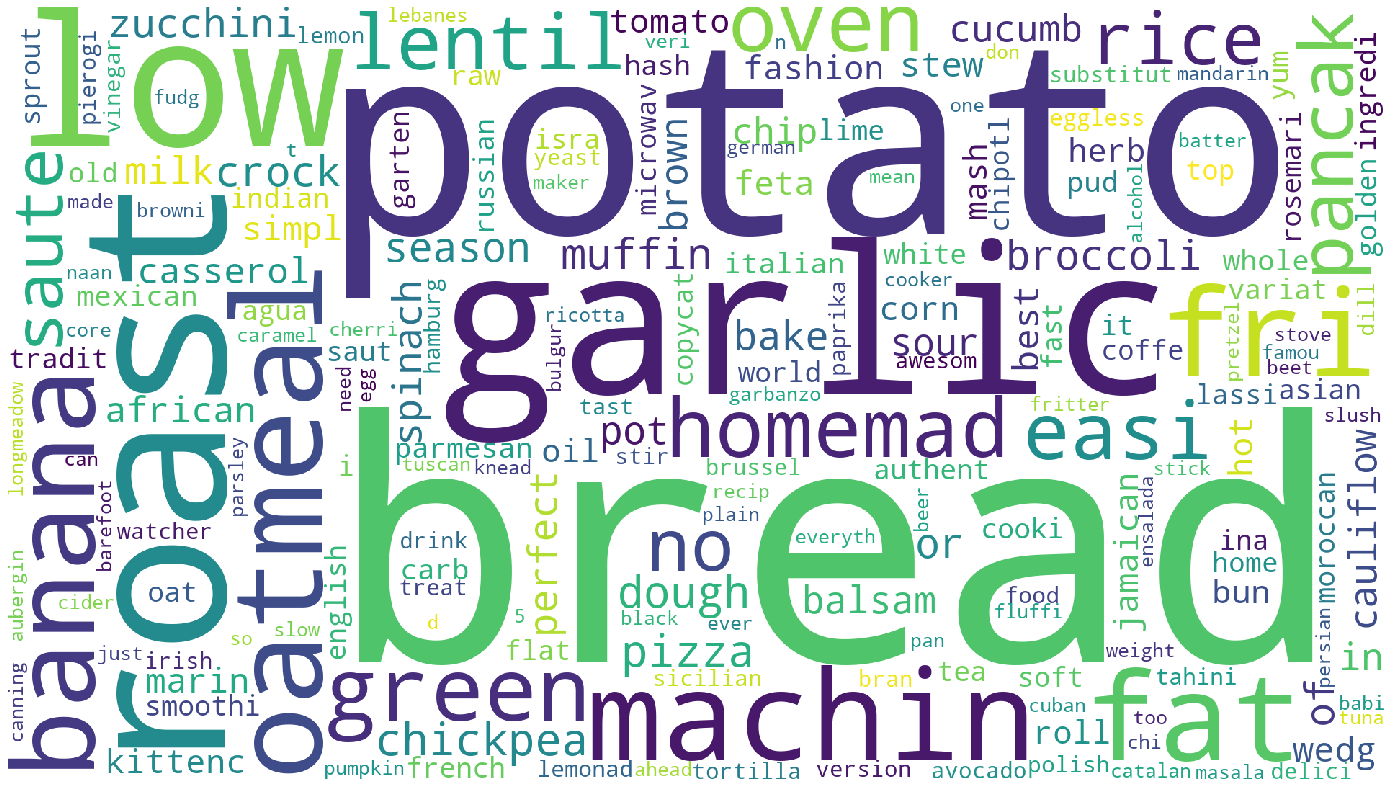

In [85]:
lo_diff_cloud_good = generate_wordcloud('name_popularity_good', None, lo_diff2, irr)

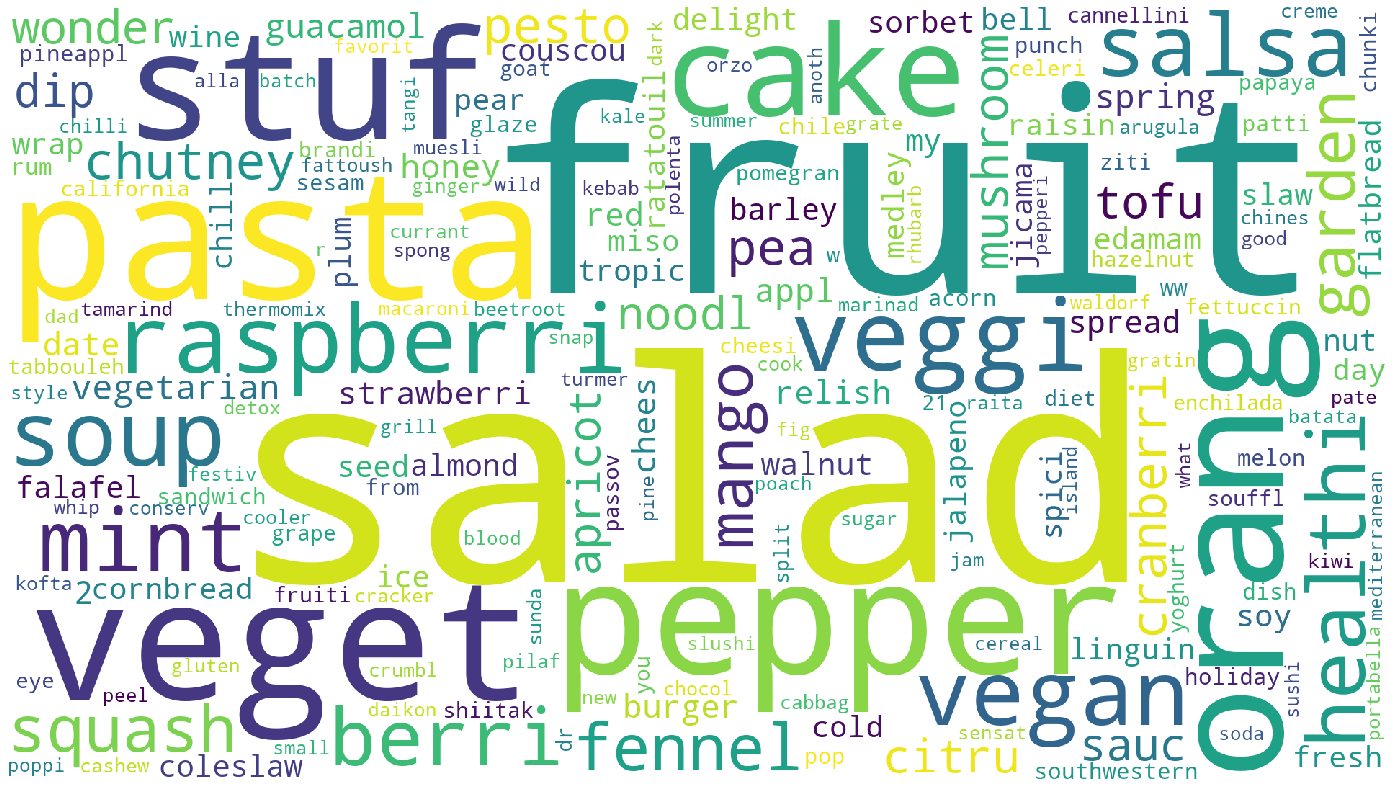

In [86]:
lo_diff_cloud_bad = generate_wordcloud('name_popularity_bad', None, {k:-v for k, v in lo_diff2.items()}, irr)

# Positive popularity (avg_rating)

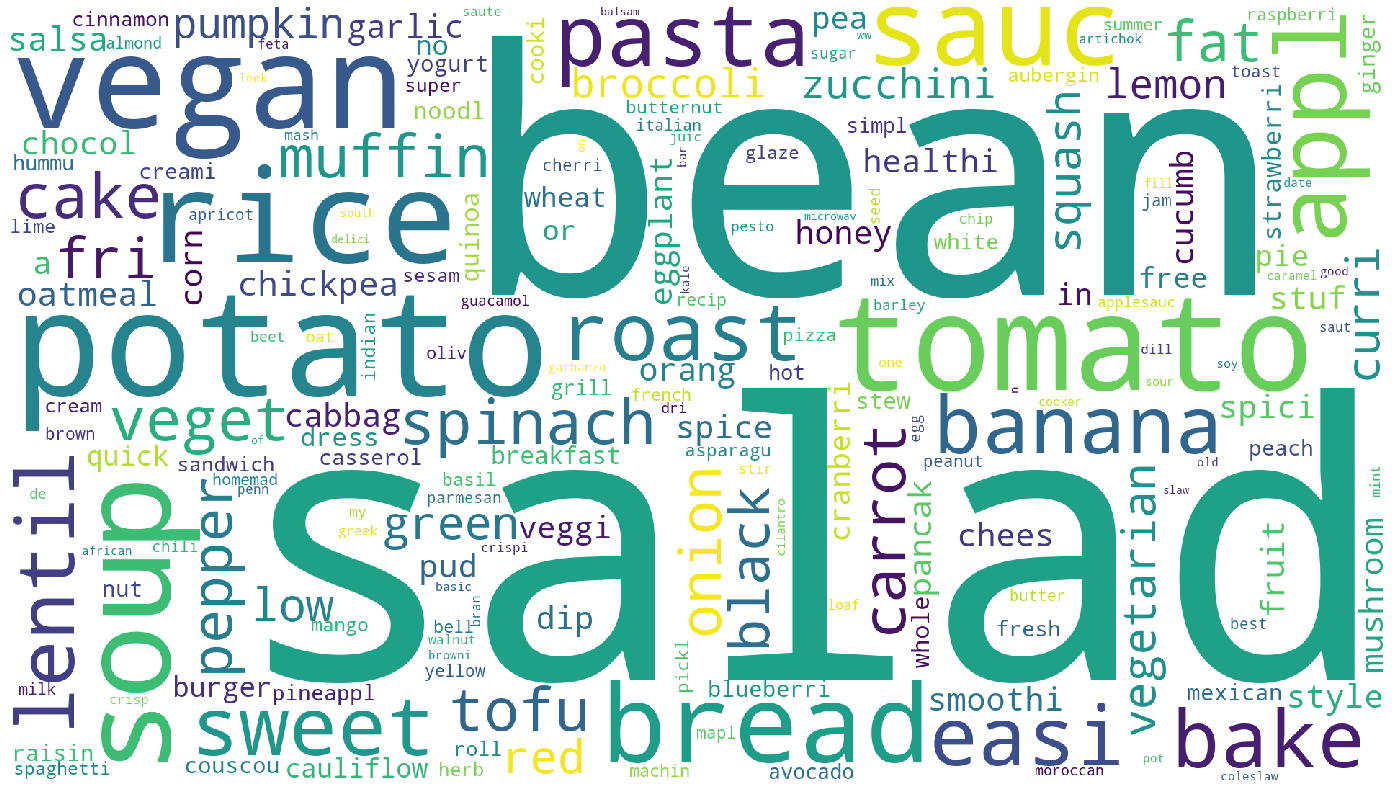

In [87]:
low_size = df_ing[df_ing.avg_rating <= 4].shape[0]
lo_low = generate_wordcloud('lalala', df_ing[df_ing.avg_rating <= 4].name, None, irr)

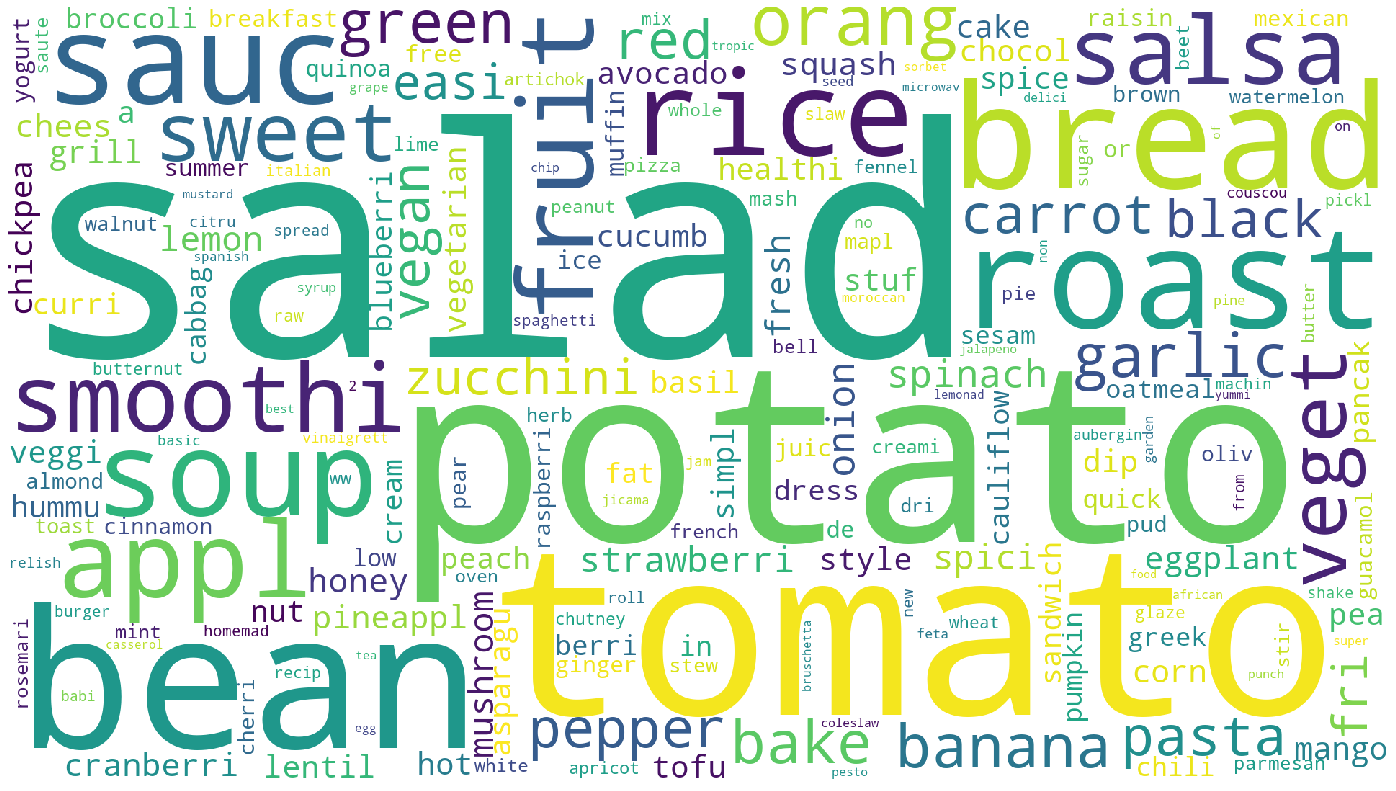

In [88]:
high_size = df_ing[df_ing.avg_rating == 5].shape[0]
lo_high = generate_wordcloud('lalala', df_ing[df_ing.avg_rating == 5].name, None, irr)

In [89]:
set(list(lo_low.keys()) + list(lo_high.keys()))

{'ritual',
 'salat',
 'mockamol',
 'vall',
 'yum',
 'tender',
 'mudslid',
 'madama',
 'haroset',
 'puti',
 'cat',
 'salata',
 'burebrot',
 'tripl',
 'probabl',
 'preserv',
 'sinless',
 'dandelion',
 'cypru',
 'fassoula',
 'filler',
 'dreami',
 'nori',
 'di',
 'laylita',
 'southwest',
 'sogan',
 'char',
 'parkin',
 'find',
 'squirnip',
 'salatah',
 'viva',
 'caribbean',
 'el',
 'japanes',
 'coconut',
 'sylvia',
 'tomatillo',
 'sandra',
 'toronto',
 'waffl',
 'parti',
 'soup',
 'bonni',
 'pickl',
 'gohan',
 'triangl',
 'clone',
 'xiao',
 'pitt',
 'all',
 'marli',
 'chewi',
 'haymak',
 'mantou',
 'ghanoush',
 'iman',
 'lemon',
 'blondi',
 'boden',
 'scarlett',
 'chico',
 'steel',
 '1917',
 'sylvi',
 'hutspot',
 'mini',
 'carmen',
 'linda',
 'brisa',
 'pfeffrnuss',
 'snowmen',
 'poshto',
 'garlici',
 'crystal',
 'pannkakor',
 'applesauc',
 'ahmar',
 'foo',
 'kedgere',
 'scampi',
 'griddl',
 'sonoma',
 'cow',
 'primavera',
 'hotpot',
 'gift',
 'either',
 'lefs',
 'shooter',
 'turlu',
 'humm

In [90]:
# Difference between average in high and average in low
lo_diff = {k: lo_high.get(k, 0)/high_size - lo_low.get(k, 0)/low_size for k in set(list(lo_low.keys()) + list(lo_high.keys()))}

In [91]:
lo_diff = dict(sorted(lo_diff.items(), key=lambda kv: kv[1]))

In [92]:
lo_diff

{'vegan': -0.02442198744449548,
 'rice': -0.01755936606648596,
 'muffin': -0.017089249748873082,
 'bean': -0.015457135117217802,
 'lentil': -0.015153763706818368,
 'soup': -0.014082288864098694,
 'fat': -0.01379187341520828,
 'cake': -0.01346410441495421,
 'tofu': -0.01342624608586942,
 'low': -0.012909185440191413,
 'curri': -0.011399227017049708,
 'pumpkin': -0.0111596258587531,
 'broccoli': -0.00967170939610076,
 'oatmeal': -0.009492008527378302,
 'pud': -0.008549420262787284,
 'sauc': -0.008490024750934258,
 'vegetarian': -0.008461252420829821,
 'easi': -0.008448801237041934,
 'pasta': -0.007096501722133327,
 'burger': -0.006985787141965369,
 'no': -0.006724144023179393,
 'noodl': -0.006566485114946299,
 'cooki': -0.006506584825372148,
 'spinach': -0.006459640497307011,
 'pie': -0.006320658364755746,
 'squash': -0.0062483068913937075,
 'wheat': -0.006140957496033288,
 'cabbag': -0.0054916450874190875,
 'spice': -0.0053498025477814164,
 'casserol': -0.005078568652293962,
 'appl': -0

In [93]:
lo_diff2 = dict(sorted(lo_diff.items(), key=lambda kv: kv[1], reverse=True))

In [94]:
lo_diff2

# Most controversial ingredient (STD per ingredient)

{'salad': 0.030541239498520167,
 'roast': 0.015278780322418358,
 'fruit': 0.013286759175597025,
 'smoothi': 0.012703572648450921,
 'orang': 0.010752270237800784,
 'salsa': 0.010512669079504173,
 'garlic': 0.009585897183508572,
 'fresh': 0.009050159762148739,
 'tomato': 0.008267586035156087,
 'strawberri': 0.00816747178713187,
 'pineappl': 0.006695371693074954,
 'mango': 0.006411686613799614,
 'berri': 0.006143817903119695,
 'ice': 0.006001975363482024,
 'asparagu': 0.0049616284802320625,
 'grill': 0.0049237701511472744,
 'greek': 0.004334358032107228,
 'watermelon': 0.0042303738215543445,
 'fennel': 0.0040286309923425224,
 'pear': 0.0039907726632577335,
 'basil': 0.00391505600508816,
 'simpl': 0.003877197676003372,
 'green': 0.0037760738725368947,
 'vinaigrett': 0.0036850456234930285,
 'rosemari': 0.003647187294408241,
 'potato': 0.0036365869622645014,
 'chili': 0.003631370925812818,
 'avocado': 0.0036155545572173955,
 'bruschetta': 0.00360310337342951,
 'punch': 0.003543203083855358,


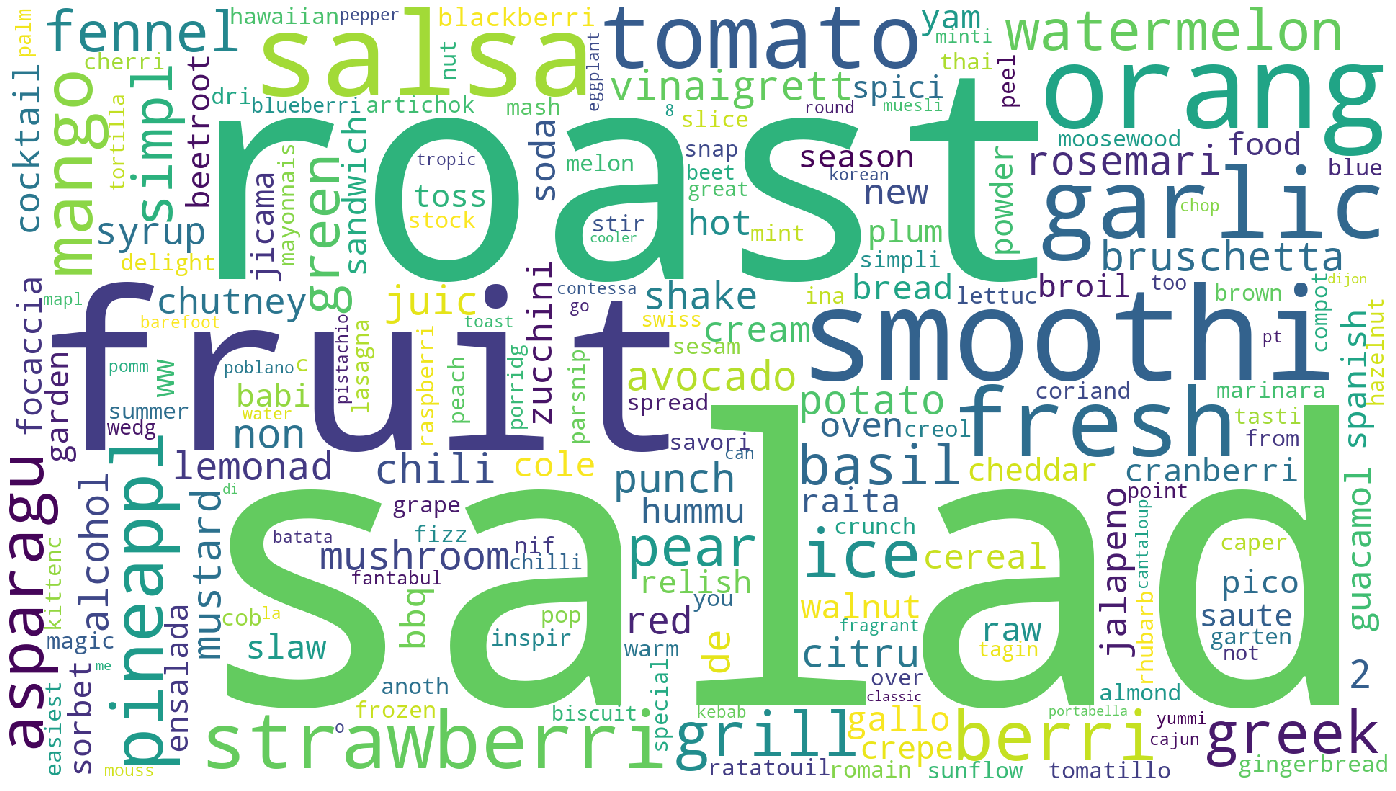

In [95]:
lo_diff_cloud_good = generate_wordcloud('name_ppopularity_good', None, lo_diff2, irr)

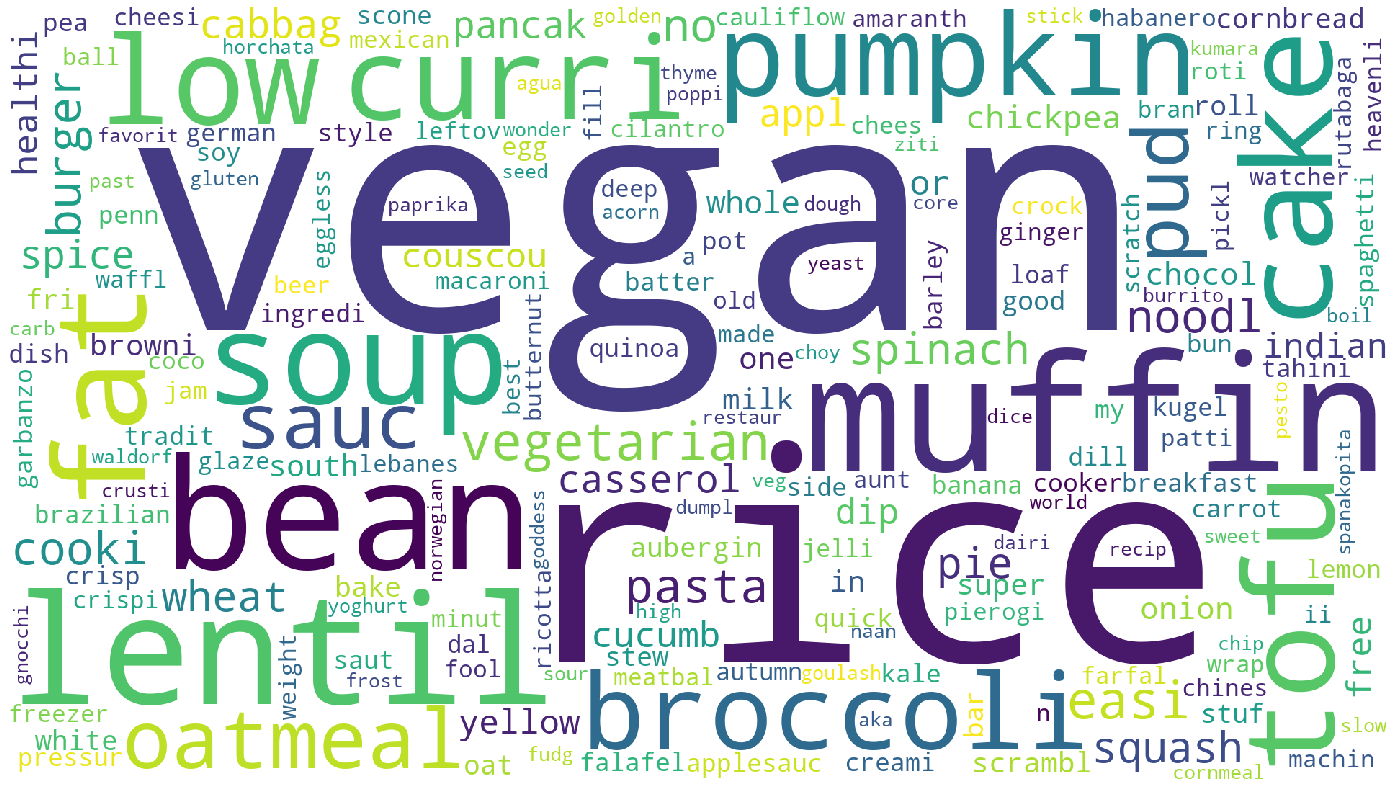

In [96]:
lo_diff_cloud_bad = generate_wordcloud('name_ppopularity_bad', None, {k:-v for k, v in lo_diff2.items()}, irr)

# BULLSHIT

In [97]:
index = (df_tag[(df_tag.vegetarian == 1) & (df_tag.inexpensive == 1)]).index
df_interesting = df.loc[index]

In [98]:
tags = [j for i in df_interesting.tags for j in i]

In [99]:
tags_dict = Counter(tags)

In [100]:
tags_dict.most_common(50)

[('preparation', 8036),
 ('vegetarian', 8036),
 ('dietary', 8036),
 ('inexpensive', 8036),
 ('time-to-make', 7999),
 ('course', 7907),
 ('main-ingredient', 7107),
 ('easy', 6631),
 ('occasion', 6158),
 ('cuisine', 5018),
 ('vegetables', 3906),
 ('low-in-something', 3750),
 ('taste-mood', 3465),
 ('beginner-cook', 3460),
 ('equipment', 3072),
 ('low-cholesterol', 2602),
 ('north-american', 2547),
 ('healthy', 2426),
 ('number-of-servings', 2423),
 ('60-minutes-or-less', 2293),
 ('vegan', 2237),
 ('kid-friendly', 2212),
 ('15-minutes-or-less', 2209),
 ('low-sodium', 2203),
 ('side-dishes', 2177),
 ('30-minutes-or-less', 2137),
 ('low-calorie', 2111),
 ('low-saturated-fat', 2108),
 ('dinner-party', 2089),
 ('low-protein', 2034),
 ('healthy-2', 1993),
 ('comfort-food', 1926),
 ('main-dish', 1840),
 ('presentation', 1835),
 ('pasta-rice-and-grains', 1769),
 ('3-steps-or-less', 1701),
 ('eggs-dairy', 1692),
 ('holiday-event', 1662),
 ('american', 1655),
 ('5-ingredients-or-less', 1636),
 ('t

In [101]:
df_interesting

name  minutes  \
54272                         fool the meat eaters  chili       40   
25775   how i got my family to eat spinach  spinach ca...       50   
95926                          say what   banana sandwich        5   
112959                     sour cream  avocado dip  vegan       10   
63793    tide me over   indian chaat  simple veggie salad        2   
...                                                   ...      ...   
202637                                 zucchini feta mash       15   
66897                                zucchini onion salad       18   
96811                                             zucotte       65   
89330   zuppa sarda  sardinian cheese and egg soup wit...       30   
207459                         zuppanitz  soup of nothing       70   

        contributor_id  submitted  \
54272            40525 2003-02-17   
25775            37305 2002-04-22   
95926           118163 2004-07-20   
112959          167849 2005-03-08   
63793            12657 2003-06-05   
...                ...        ...   
202637           40114 2006-12-30   
66897            92725 2003-07-16   
96811            65056 2004-08-03   
89330            94272 2004-04-18   
207459          436491 2007-01-24   

                                                     tags  \
54272   [60-minutes-or-less, time-to-make, course, mai...   
25775   [60-minutes-or-less, time-to-make, course, mai...   
95926   [15-minutes-or-less, time-to-make, course, mai...   
112959  [lactose, 15-minutes-or-less, time-to-make, co...   
63793   [15-minutes-or-less, time-to-make, course, mai...   
...                                                   ...   
202637  [15-minutes-or-less, time-to-make, course, mai...   
66897   [30-minutes-or-less, time-to-make, course, mai...   
96811   [time-to-make, course, main-ingredient, prepar...   
89330   [30-minutes-or-less, time-to-make, course, mai...   
207459  [time-to-make, course, main-ingredient, prepar...   

                                          nutrition  n_steps  \
54272     [295.6, 3.0, 56.0, 76.0, 32.0, 1.0, 18.0]        9   
25775     [166.1, 16.0, 6.0, 32.0, 19.0, 26.0, 3.0]        5   
95926     [238.0, 3.0, 66.0, 10.0, 10.0, 2.0, 17.0]        4   
112959         [12.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]        6   
63793         [73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]        4   
...                                             ...      ...   
202637   [190.2, 22.0, 19.0, 17.0, 15.0, 31.0, 3.0]        8   
66897      [231.1, 28.0, 27.0, 8.0, 8.0, 56.0, 5.0]       10   
96811      [145.7, 13.0, 10.0, 2.0, 3.0, 27.0, 5.0]       10   
89330   [733.4, 65.0, 12.0, 46.0, 71.0, 78.0, 17.0]       10   
207459      [133.9, 12.0, 6.0, 2.0, 3.0, 16.0, 4.0]       10   

                                                    steps  \
54272   [rehydrate tvp if needed, spray or oil a large...   
25775   [preheat oven to 350 degrees, place spinach in...   
95926   [spread a tablespoon on one side of each slice...   
112959  [peel and pit avocado , put in a large mixing ...   
63793   [toss everything well in a serving bowl, grab ...   
...                                                   ...   
202637  [juice the lemon, grate the zucchini coarsely,...   
66897   [grate zucchini, dice onion, over medium heat ...   
96811   [in a large , heavy saucpan , melt 1 tbs of th...   
89330   [preheat oven to 350 degrees f, brush bread sl...   
207459  [add oil to stock pot over medium heat, add ch...   

                                              description  \
54272   this recipe was adapted by my mother and mysel...   
25775   if spinach scares you, this is one recipe that...   
95926              you just have to try it to believe it.   
112959  i made this up when i had an avocado that was ...   
63793   this version of the famous indian chaat (prono...   
...                                                   ...   
202637  a nice and healthy alternative for mashed pota...   
66897   i wrinkled my nose at this in the be

In [102]:
df_ing[(df_ing.onion == 1) & (df_ing.submitted == np.datetime64('2002'))].shape[0] / df[df.submitted.astype('datetime64[Y]') == np.datetime64('2002')].shape[0]

0.021879895561357703

In [103]:
total_dict

{Timestamp('1999-01-01 00:00:00'): 1991,
 Timestamp('2000-01-01 00:00:00'): 1014,
 Timestamp('2001-01-01 00:00:00'): 4402,
 Timestamp('2002-01-01 00:00:00'): 19150,
 Timestamp('2003-01-01 00:00:00'): 17137,
 Timestamp('2004-01-01 00:00:00'): 15705,
 Timestamp('2005-01-01 00:00:00'): 22826,
 Timestamp('2006-01-01 00:00:00'): 26045,
 Timestamp('2007-01-01 00:00:00'): 32842,
 Timestamp('2008-01-01 00:00:00'): 29459,
 Timestamp('2009-01-01 00:00:00'): 21664,
 Timestamp('2010-01-01 00:00:00'): 11440,
 Timestamp('2011-01-01 00:00:00'): 7282,
 Timestamp('2012-01-01 00:00:00'): 4962,
 Timestamp('2013-01-01 00:00:00'): 3631,
 Timestamp('2014-01-01 00:00:00'): 990,
 Timestamp('2015-01-01 00:00:00'): 280,
 Timestamp('2016-01-01 00:00:00'): 192,
 Timestamp('2017-01-01 00:00:00'): 271,
 Timestamp('2018-01-01 00:00:00'): 175}

In [104]:
df[df.submitted.astype('datetime64[Y]') == np.datetime64('2018')].shape[0]

175